In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import os
import time
import re
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import griddata
from pearlsim.ml_utilities import *
from pearlsim.group_definitions import *
from pearlsim.results_processing import read_core_flux
import pickle
from sklearn.neighbors import KNeighborsRegressor

In [2]:
det_name = f"gFHR_equilibrium_training_490.serpent_det0.m"
#aux_name = f"current_auxiliary_features{step}.csv"
meshes, pebble_features, pebble_targets, zone_features = read_det_file(f"gFHR_sequence/{det_name}", 
                                                                       read_pebbles=True,
                                                                    meshes_to_read=["coarse_7group_flux",
                                                                                    "core_56group_flux",
                                                                                    "subzone_power"], 
                                                                    mesh_grids_rze = [(RADIUS_GRID_3, HEIGHT_GRID_8, ENERGY_GRID_7),
                                                                                      ([0.0, 120.0], [60.0, 369.47], ENERGY_GRID_56),
                                                                                      (RADIUS_GRID_8, HEIGHT_GRID_20, [0,20]) ] )
pebble_features

x         y         z  pebble_id
0    25.5285   -0.6124  111.9720      10024
1    62.1154  -64.2189  204.1480     153815
2   -92.0788   49.6299  125.8300     204519
3   -80.8194   71.2452  310.8860     239936
4    -8.2258 -111.5100  123.2920     203319
..       ...       ...       ...        ...
95  103.1350   -3.8325  137.1940     139783
96  -16.0415    4.8066  226.5000      35714
97   76.6493  -11.2504  216.0810      98922
98   78.3543  -66.3793  326.8657     180529
99    5.9391  -68.6103  223.3690      97643

[100 rows x 4 columns]



490


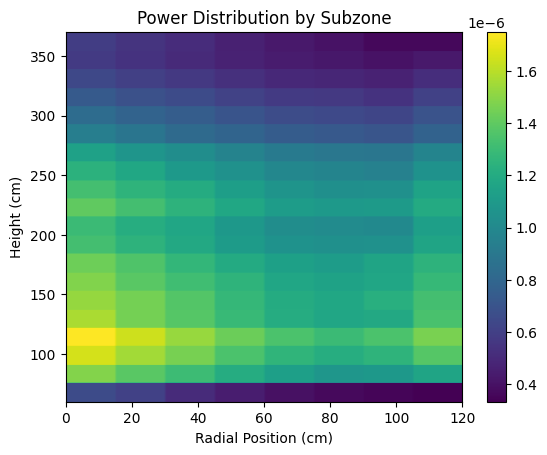

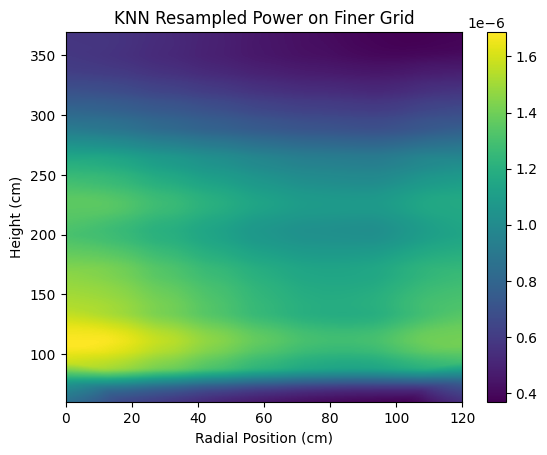

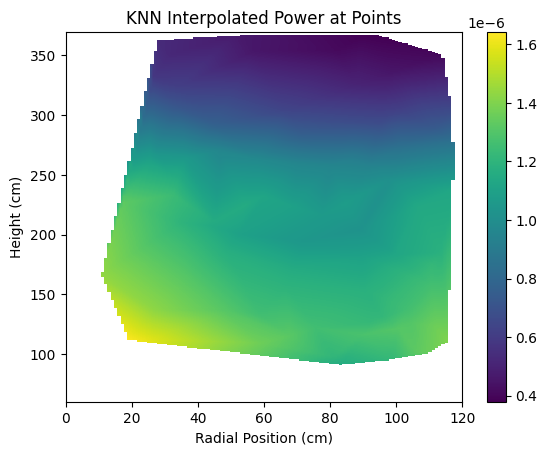

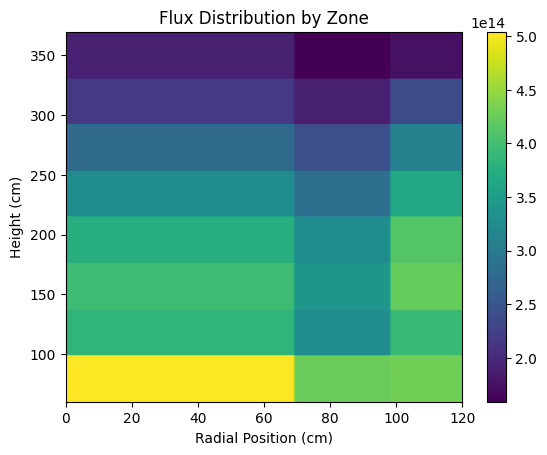

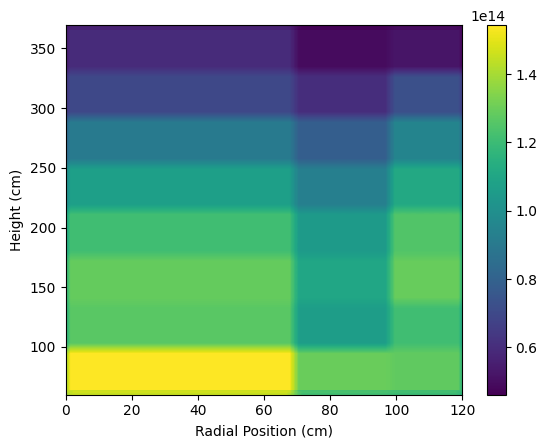

/global/scratch/users/ikolaja/PEARLSim_dev/PEARLSim/pearlsim/ml_utilities.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_plot_df["energy"] = group_energy


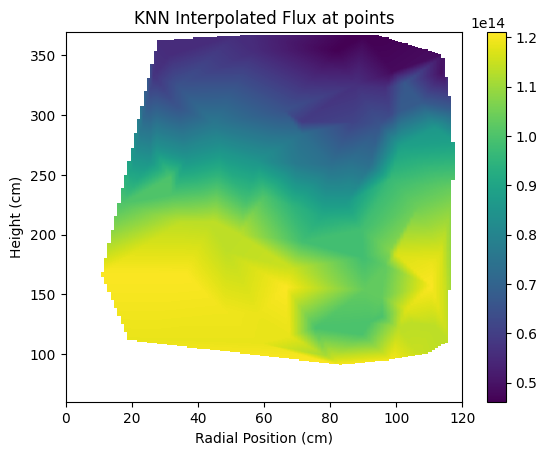

2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0    8.400630e+10  5.504810e+11  3.555960e+12  5.599310e+12  4.744630e+12   
1    7.442920e+10  4.745580e+11  3.092540e+12  4.836460e+12  4.164360e+12   
2    6.636120e+10  4.285820e+11  2.758540e+12  4.367280e+12  3.728520e+12   
3    7.742700e+10  5.013720e+11  3.163550e+12  5.017260e+12  4.282750e+12   
4    6.524800e+10  4.319340e+11  2.829090e+12  4.520230e+12  3.928480e+12   
..            ...           ...           ...           ...           ...   
575  1.570360e+11  5.707260e+11  2.209080e+12  6.080280e+12  4.292280e+12   
576  8.496920e+10  4.910680e+11  2.459520e+12  3.785300e+12  5.018000e+12   
577  1.281590e+11  3.158640e+11  3.366200e+12  2.994720e+12  2.839700e+12   
578  6.310520e+10  3.119280e+11  2.148960e+12  2.822730e+12  2.505330e+12   
579  4.771320e+10  5.018360e+11  2.633580e+12  2.626130e+12  4.271950e+12   

          5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  \
0    5.208750e+12  1.134180e+13  1.176680e+13  2.767250e+13  2.239990e+13   
1    4.555140e+12  9.811330e+12  1.033800e+13  2.431620e+13  1.977140e+13   
2    4.090870e+12  8.842750e+12  9.278130e+12  2.174440e+13  1.727730e+13   
3    4.623610e+12  9.949510e+12  1.027400e+13  2.374780e+13  1.879390e+13   
4    4.311670e+12  9.565210e+12  1.004910e+13  2.438800e+13  2.051240e+13   
..            ...           ...           ...           ...           ...   
575  3.989130e+12  9.379620e+12  8.537600e+12  2.407950e+13  1.771140e+13   
576  3.431940e+12  1.005800e+13  8.428800e+12  2.350620e+13  1.862050e+13   
577  4.323640e+12  8.115590e+12  6.950540e+12  1.879060e+13  1.238970e+13   
578  8.863880e+11  4.006940e+12  4.472690e+12  1.225220e+13  8.514400e+12   
579  4.039960e+12  9.946910e+12  6.813320e+12  2.185920e+13  1.958940e+13   

     ...      5.35e-01      6.75e-01    8.0555e-01    1.0305e+00  \
0    ...  8.981360e+12  8.989650e+12  5.376130e+12  1.312360e+13   
1    ...  8.054650e+12  7.472090e+12  4.906190e+12  1.128190e+13   
2    ...  6.759940e+12  6.995310e+12  4.164320e+12  1.003620e+13   
3    ...  5.579420e+12  5.485740e+12  3.597160e+12  8.461300e+12   
4    ...  1.143250e+13  1.103060e+13  6.887620e+12  1.628490e+13   
..   ...           ...           ...           ...           ...   
575  ...  5.036870e+12  6.946340e+12  4.574810e+12  2.037710e+13   
576  ...  5.684810e+12  1.074040e+13  3.735940e+12  1.677580e+13   
577  ...  1.206640e+13  1.388930e+13  7.697420e+12  1.489500e+13   
578  ...  3.144910e+12  1.760980e+12  2.745500e+12  4.742150e+12   
579  ...  8.275170e+12  1.248860e+13  5.577660e+12  1.253070e+13   

         1.35e+00     1.675e+00     2.425e+00     3.652e+00     5.369e+00  \
0    8.429400e+12  7.871420e+12  1.433330e+13  5.656670e+12  3.349390e+12   
1    7.627700e+12  6.826900e+12  1.253490e+13  4.773680e+12  2.716840e+12   
2    6.420650e+12  6.020100e+12  1.067750e+13  4.409850e+12  2.303250e+12   
3    5.474540e+12  5.070970e+12  9.696120e+12  3.824130e+12  2.290530e+12   
4    1.073230e+13  9.728830e+12  1.709870e+13  6.545030e+12  3.677780e+12   
..            ...           ...           ...           ...           ...   
575  7.563100e+12  6.550990e+12  6.968080e+12  3.946140e+12  2.500780e+12   
576  1.389480e+13  5.708720e+12  1.350040e+13  5.126590e+12  1.911380e+12   
577  5.815870e+12  1.379990e+13  6.119620e+12  3.947610e+12  0.000000e+00   
578  9.549690e+11  3.757380e+12  2.292020e+12  3.401330e+12  0.000000e+00   
579  9.251100e+12  7.303150e+12  1.442080e+13  4.008320e+12  1.268200e+12   

       1.3217e+01  
0    8.041250e+11  
1    7.394460e+11  
2    6.899460e+11  
3    5.538340e+11  
4    1.005210e+12  
..            ...  
575  0.000000e+00  
576  0.000000e+00  
577  1.467630e+12  
578  1.271120e+12  
579  0.000000e+00  

[580 rows x 56 columns]

0      5.473860e+16
1      4.731600e+16
2      4.060600e+16
3      3.363000e+16
4      6.635270e+16
           ...     
575    4.714290e+16
576    6.080720e+16
577    5.083540e+16
578    2.144480e+16
579    5.386380e+16
Name: total_flux, Length: 580, dtype: float64

In [6]:
current_data = []
current_targets = []
flux_data = []
flux_targets = []
xs_data_dict = []
xs_targets_dict = []

training_file_locations = [ ("gFHR_sequence/", 490)]
              #("gFHR_sequence/", 10),
              #("gFHR_sequence/", 105),
              #("gFHR_sequence/", 150),
              #("gFHR_sequence/", 200),
              #("gFHR_sequence/", 250),
              #("gFHR_sequence/", 300),
              #("gFHR_sequence/", 350),
              #("gFHR_sequence/", 400),
             # ("gFHR_sequence/", 490)#,
             # ("gFHR_sequence3/", 54),
             # ("gFHR_sequence3/", 87)]

for file in training_file_locations:
    print(f"\n\n{file[1]}")
    current_x, current_y, flux_x, flux_y, xs_x_dict, xs_y_dict = extract_ml_samples_from_training_step(
        file[1], file[0], 0.15, 0.3, 0.2, example_plot = False)
    current_data += [current_x]
    current_targets += [current_y]
    flux_data += [flux_x]
    flux_targets += [flux_y]
    xs_data_dict += [xs_x_dict]
    xs_targets_dict += [xs_y_dict]


In [9]:
xs_x_dict

{'10030-16':               2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
 0       8.400630e+10  5.504810e+11  3.555960e+12  5.599310e+12  4.744630e+12   
 889     7.442920e+10  4.745580e+11  3.092540e+12  4.836460e+12  4.164360e+12   
 1778    6.636120e+10  4.285820e+11  2.758540e+12  4.367280e+12  3.728520e+12   
 2667    7.742700e+10  5.013720e+11  3.163550e+12  5.017260e+12  4.282750e+12   
 3556    6.524800e+10  4.319340e+11  2.829090e+12  4.520230e+12  3.928480e+12   
 ...              ...           ...           ...           ...           ...   
 420497  5.202230e+10  3.394470e+11  2.141640e+12  3.297360e+12  2.882000e+12   
 421386  5.439660e+10  3.268270e+11  2.064200e+12  3.161130e+12  2.759290e+12   
 422275  7.976430e+10  4.591870e+11  2.881740e+12  4.411160e+12  3.720770e+12   
 423164  5.371290e+10  3.212500e+11  2.066480e+12  3.210900e+12  2.817020e+12   
 424053  4.879470e+10  2.910580e+11  1.834010e+12  2.838950e+12  2.485840e+12   
 
              

In [15]:
all_current_data = pd.concat(current_data).reset_index(drop=True)
display(all_current_data.iloc[0:10])
print(len(all_current_data))
all_current_data.to_csv("training_data/current_data.csv.gz")

all_current_targets = pd.concat(current_targets).reset_index(drop=True)
display(all_current_targets.iloc[0:10])
print(len(all_current_targets))
all_current_targets.to_csv("training_data/current_targets.csv.gz")

local_fima  local_graphite_frac   radius  height        energy  \
0         0.0             0.905213  41.0728  99.861  2.000000e-09   
1         0.0             0.905213  41.0728  99.861  7.000000e-09   
2         0.0             0.905213  41.0728  99.861  1.765000e-08   
3         0.0             0.905213  41.0728  99.861  3.265000e-08   
4         0.0             0.905213  41.0728  99.861  4.500000e-08   
5         0.0             0.905213  41.0728  99.861  5.500000e-08   
6         0.0             0.905213  41.0728  99.861  7.000000e-08   
7         0.0             0.905213  41.0728  99.861  9.000000e-08   
8         0.0             0.905213  41.0728  99.861  1.250000e-07   
9         0.0             0.905213  41.0728  99.861  1.750000e-07   

   core_flux_at_energy  interpolated_power  interpolated_flux  
0         3.491194e+02        8.048270e-09       8.469677e+12  
1         2.429609e+12        8.048270e-09       8.469677e+12  
2         8.880227e+12        8.048270e-09       8.469677e+12  
3         1.997419e+13        8.048270e-09       8.469677e+12  
4         3.077317e+13        8.048270e-09       8.469677e+12  
5         3.970302e+13        8.048270e-09       8.469677e+12  
6         4.193865e+13        8.048270e-09       8.469677e+12  
7         4.193865e+13        8.048270e-09       8.469677e+12  
8         4.206543e+13        8.048270e-09       8.469677e+12  
9         3.766846e+13        8.048270e-09       8.469677e+12

56371


0    5.259872e+17
1    2.064793e+18
2    4.616274e+18
3    7.273652e+18
4    8.787999e+18
5    9.308973e+18
6    1.007938e+19
7    1.027713e+19
8    9.102986e+18
9    6.882815e+18
Name: current, dtype: float64

56371


In [16]:
all_flux_data = pd.concat(flux_data).reset_index(drop=True).fillna(0.0)
display(all_flux_data.iloc[0:10])
print(len(all_flux_data))
all_flux_data.to_csv("training_data/flux_data.csv.gz")

all_flux_targets = pd.concat(flux_targets).reset_index(drop=True)
display(all_flux_targets.iloc[0:10])
print(len(all_flux_targets))
all_flux_targets.to_csv("training_data/flux_targets.csv.gz")

1001<lib>  1002<lib>  1003<lib>  2003<lib>  2004<lib>  3006<lib>  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   
5        0.0        0.0        0.0        0.0        0.0        0.0   
6        0.0        0.0        0.0        0.0        0.0        0.0   
7        0.0        0.0        0.0        0.0        0.0        0.0   
8        0.0        0.0        0.0        0.0        0.0        0.0   
9        0.0        0.0        0.0        0.0        0.0        0.0   

   3007<lib>  34074<lib>  34080<lib>  34082<lib>  ...  942340  952380  962380  \
0        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
1        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
2        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
3        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
4        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
5        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
6        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
7        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
8        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   
9        0.0         0.0         0.0         0.0  ...     0.0     0.0     0.0   

   461000  581340  541220  561280  571340  430940  531220  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
6     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
7     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[10 rows x 1323 columns]

35555


0    3.083821e+18
1    1.788159e+19
2    4.206318e+19
3    7.174927e+19
4    9.126150e+19
5    9.927316e+19
6    1.083912e+20
7    1.166811e+20
8    9.470492e+19
9    7.126474e+19
Name: flux, dtype: float64

35555


In [17]:
key_set = set()
for dic in xs_data_dict:
    for key in dic.keys():
        key_set.add(key)

In [18]:
for key in key_set:
    print(key)
    xs_reaction_data = []
    xs_reaction_targets = []
    for step in range(len(xs_data_dict)):
        try:
            xs_reaction_data += [xs_data_dict[step][key]]
            xs_reaction_targets += [xs_targets_dict[step][key]]
        except:
            pass
    xs_input = pd.concat(xs_reaction_data).reset_index(drop=True)
    xs_output = pd.concat(xs_reaction_targets).reset_index(drop=True)
    display(xs_input.iloc[0:2])
    print(len(xs_input))
    display(xs_output.iloc[0:2])
    print(len(xs_output))
    xs_input.to_csv(f"training_data/xs_data_{key}.csv.gz")
    xs_output.to_csv(f"training_data/xs_targets_{key}.csv.gz")

541330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3700


0    0.00001
1    0.00001
Name: xs, dtype: float64

3700
541340-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

756


0    4.905730e-10
1    4.870500e-12
Name: xs, dtype: float64

756
922400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4636


0    0.298448
1    0.309645
Name: xs, dtype: float64

4636
400950-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3817


0    7.450770e-10
1    8.075880e-10
Name: xs, dtype: float64

3817
541300-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5741


0    0.017426
1    0.017335
Name: xs, dtype: float64

5741
912320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1252


0    8.437170e-08
1    4.599360e-08
Name: xs, dtype: float64

1252
441030-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5390


0    0.013060
1    0.013095
Name: xs, dtype: float64

5390
621510-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1563


0    5.689250e-10
1    2.009110e-08
Name: xs, dtype: float64

1563
350810-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4906


0    0.017095
1    0.018297
Name: xs, dtype: float64

4906
922350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4049


0    0.000011
1    0.000011
Name: xs, dtype: float64

4049
932350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1304


0    3.687300e-11
1    1.794980e-10
Name: xs, dtype: float64

1304
952430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5414


0    0.665424
1    0.669097
Name: xs, dtype: float64

5414
370870-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2432


0    4.761460e-07
1    6.568370e-07
Name: xs, dtype: float64

2432
400910-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3302


0    0.000002
1    0.000002
Name: xs, dtype: float64

3302
591410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2564


0    5.359430e-07
1    7.092670e-07
Name: xs, dtype: float64

2564
531310-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3640


0    2.605760e-10
1    2.936020e-10
Name: xs, dtype: float64

3640
601470-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1135


0    1.050820e-08
1    4.928820e-08
Name: xs, dtype: float64

1135
531300-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3799


0    1.440970e-08
1    1.598260e-08
Name: xs, dtype: float64

3799
932360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3995


0    0.000007
1    0.000007
Name: xs, dtype: float64

3995
461070-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

351


0    2.905550e-10
1    1.861280e-13
Name: xs, dtype: float64

351
360830-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4077


0    5.400940e-09
1    5.519210e-09
Name: xs, dtype: float64

4077
360860-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4999


0    0.000008
1    0.000008
Name: xs, dtype: float64

4999
601460-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3214


0    0.000005
1    0.000005
Name: xs, dtype: float64

3214
481110-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4088


0    8.560190e-08
1    8.818640e-08
Name: xs, dtype: float64

4088
561370-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5719


0    0.013215
1    0.013154
Name: xs, dtype: float64

5719
932380-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    7.41545
1    7.39606
Name: xs, dtype: float64

5787
420950-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5266


0    0.068297
1    0.066921
Name: xs, dtype: float64

5266
461060-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5030


0    0.002548
1    0.002597
Name: xs, dtype: float64

5030
952421-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    32.4052
1    32.3306
Name: xs, dtype: float64

5787
561400-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3768


0    9.294060e-10
1    9.361250e-10
Name: xs, dtype: float64

3768
902330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4138


0    0.000061
1    0.000058
Name: xs, dtype: float64

4138
481060-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4507


0    0.000006
1    0.000006
Name: xs, dtype: float64

4507
922360-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

63


0    2.077520e-11
1    7.556360e-17
Name: xs, dtype: float64

63
461100-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3453


0    1.266060e-09
1    1.453060e-09
Name: xs, dtype: float64

3453
441010-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4253


0    2.260010e-08
1    2.305220e-08
Name: xs, dtype: float64

4253
410940-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4747


0    3.676650e-07
1    3.680720e-07
Name: xs, dtype: float64

4747
942360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1579


0    3.352160e-11
1    5.969380e-10
Name: xs, dtype: float64

1579
380900-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3173


0    9.150700e-10
1    9.805560e-10
Name: xs, dtype: float64

3173
932370-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

37


0    5.557830e-14
1    1.255410e-14
Name: xs, dtype: float64

37
581360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

106


0    3.586850e-10
1    7.574730e-11
Name: xs, dtype: float64

106
922330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.215988
1    0.215185
Name: xs, dtype: float64

5787
962470-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4030


0    0.000003
1    0.000003
Name: xs, dtype: float64

4030
400910-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4503


0    1.334840e-07
1    1.326800e-07
Name: xs, dtype: float64

4503
611481-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4353


0    3.971870e-09
1    4.225220e-09
Name: xs, dtype: float64

4353
531350-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2785


0    1.332190e-10
1    1.253090e-10
Name: xs, dtype: float64

2785
441050-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3673


0    6.934160e-09
1    7.722390e-09
Name: xs, dtype: float64

3673
420920-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1081


0    3.774370e-08
1    2.169190e-08
Name: xs, dtype: float64

1081
902270-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4048


0    0.000034
1    0.000033
Name: xs, dtype: float64

4048
902340-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3806


0    0.000019
1    0.000020
Name: xs, dtype: float64

3806
400930-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4781


0    0.005841
1    0.006060
Name: xs, dtype: float64

4781
461070-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3650


0    0.00001
1    0.00001
Name: xs, dtype: float64

3650
390910-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3106


0    0.000003
1    0.000003
Name: xs, dtype: float64

3106
370850-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4313


0    3.835630e-07
1    3.793230e-07
Name: xs, dtype: float64

4313
421000-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2942


0    0.000002
1    0.000002
Name: xs, dtype: float64

2942
591410-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3886


0    8.638120e-09
1    9.627060e-09
Name: xs, dtype: float64

3886
912320-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.84439
1    5.83112
Name: xs, dtype: float64

5787
591420-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5720


0    0.000019
1    0.000019
Name: xs, dtype: float64

5720
581380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2495


0    4.629480e-07
1    6.273220e-07
Name: xs, dtype: float64

2495
581400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2622


0    9.667180e-07
1    1.261290e-06
Name: xs, dtype: float64

2622
380880-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3422


0    6.712780e-09
1    7.584910e-09
Name: xs, dtype: float64

3422
440960-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4290


0    0.000003
1    0.000003
Name: xs, dtype: float64

4290
591420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5534


0    0.084674
1    0.084459
Name: xs, dtype: float64

5534
360850-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3618


0    1.054530e-09
1    1.013760e-09
Name: xs, dtype: float64

3618
471090-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

269


0    2.511910e-12
1    8.005900e-09
Name: xs, dtype: float64

269
922400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2013


0    2.674660e-07
1    1.769860e-07
Name: xs, dtype: float64

2013
531300-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3567


0    0.000005
1    0.000005
Name: xs, dtype: float64

3567
440990-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3239


0    0.000004
1    0.000004
Name: xs, dtype: float64

3239
481080-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4038


0    2.174530e-08
1    2.233290e-08
Name: xs, dtype: float64

4038
400900-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3860


0    5.200350e-09
1    5.566480e-09
Name: xs, dtype: float64

3860
922330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1905


0    1.443340e-11
1    1.481850e-10
Name: xs, dtype: float64

1905
942390-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

70


0    1.696020e-11
1    1.931320e-14
Name: xs, dtype: float64

70
421000-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2790


0    3.360550e-10
1    3.825840e-10
Name: xs, dtype: float64

2790
922380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3839


0    0.000014
1    0.000014
Name: xs, dtype: float64

3839
380900-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3737


0    6.758120e-10
1    7.480680e-10
Name: xs, dtype: float64

3737
400920-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4123


0    5.064310e-08
1    5.087210e-08
Name: xs, dtype: float64

4123
952421-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    6.30950
1    6.29516
Name: xs, dtype: float64

5787
410950-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4116


0    1.987330e-08
1    2.005100e-08
Name: xs, dtype: float64

4116
10030-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3023


0    1.420650e-08
1    1.542230e-08
Name: xs, dtype: float64

3023
601450-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5781


0    7.534250e-07
1    7.569190e-07
Name: xs, dtype: float64

5781
451030-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

221


0    6.456520e-09
1    6.387350e-11
Name: xs, dtype: float64

221
441000-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5690


0    0.022362
1    0.022326
Name: xs, dtype: float64

5690
952440-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

169


0    6.267040e-09
1    3.574410e-12
Name: xs, dtype: float64

169
440990-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

108


0    6.747470e-09
1    6.370920e-10
Name: xs, dtype: float64

108
962470-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5761


0    0.619852
1    0.615113
Name: xs, dtype: float64

5761
30060-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000138
1    0.000137
Name: xs, dtype: float64

5787
451050-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

384


0    1.475360e-10
1    2.416790e-13
Name: xs, dtype: float64

384
360860-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2871


0    9.855800e-10
1    9.539440e-10
Name: xs, dtype: float64

2871
380870-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5487


0    0.080420
1    0.081542
Name: xs, dtype: float64

5487
370850-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2205


0    4.194930e-07
1    2.755560e-07
Name: xs, dtype: float64

2205
561340-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2548


0    6.652390e-07
1    8.997260e-07
Name: xs, dtype: float64

2548
611470-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5545


0    0.962165
1    0.975045
Name: xs, dtype: float64

5545
581430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4020


0    0.000019
1    0.000019
Name: xs, dtype: float64

4020
551350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

458


0    1.029820e-09
1    1.449270e-10
Name: xs, dtype: float64

458
370860-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2796


0    8.228270e-07
1    1.004560e-06
Name: xs, dtype: float64

2796
511240-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5691


0    0.089564
1    0.089545
Name: xs, dtype: float64

5691
922360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3675


0    0.000006
1    0.000006
Name: xs, dtype: float64

3675
902340-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5104


0    0.000041
1    0.000040
Name: xs, dtype: float64

5104
932370-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5704


0    0.001905
1    0.001907
Name: xs, dtype: float64

5704
511240-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

556


0    2.154220e-09
1    3.690290e-10
Name: xs, dtype: float64

556
441040-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

694


0    1.027040e-09
1    1.376640e-10
Name: xs, dtype: float64

694
611490-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5784


0    5.19945
1    5.18747
Name: xs, dtype: float64

5784
360840-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

99


0    3.318850e-09
1    1.519310e-10
Name: xs, dtype: float64

99
481080-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4015


0    9.502560e-08
1    9.828810e-08
Name: xs, dtype: float64

4015
621440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2170


0    4.571740e-07
1    2.997580e-07
Name: xs, dtype: float64

2170
912310-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5785


0    2.20959
1    2.20329
Name: xs, dtype: float64

5785
461050-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4046


0    8.517570e-08
1    8.820780e-08
Name: xs, dtype: float64

4046
571400-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5714


0    0.000001
1    0.000001
Name: xs, dtype: float64

5714
461020-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

48


0    3.480540e-11
1    2.891320e-14
Name: xs, dtype: float64

48
531310-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2853


0    0.000002
1    0.000002
Name: xs, dtype: float64

2853
440990-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5207


0    0.058356
1    0.056682
Name: xs, dtype: float64

5207
380900-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1133


0    9.690140e-09
1    3.274880e-09
Name: xs, dtype: float64

1133
902320-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5174


0    0.00008
1    0.00008
Name: xs, dtype: float64

5174
902270-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1216


0    1.248060e-08
1    3.896980e-08
Name: xs, dtype: float64

1216
521300-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3158


0    3.603060e-09
1    4.066590e-09
Name: xs, dtype: float64

3158
601460-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5684


0    0.005806
1    0.005773
Name: xs, dtype: float64

5684
561320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

160


0    1.874510e-08
1    3.658470e-11
Name: xs, dtype: float64

160
962440-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5732


0    0.006396
1    0.006341
Name: xs, dtype: float64

5732
902330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1908


0    2.540300e-07
1    1.615520e-07
Name: xs, dtype: float64

1908
541340-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5643


0    0.001017
1    0.001021
Name: xs, dtype: float64

5643
942440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3905


0    0.000019
1    0.000019
Name: xs, dtype: float64

3905
551360-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3740


0    4.577660e-10
1    5.159390e-10
Name: xs, dtype: float64

3740
621440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5776


0    0.006076
1    0.006071
Name: xs, dtype: float64

5776
561370-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3465


0    0.000006
1    0.000007
Name: xs, dtype: float64

3465
681640-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2778


0    0.000002
1    0.000002
Name: xs, dtype: float64

2778
902340-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5768


0    0.023349
1    0.023402
Name: xs, dtype: float64

5768
621510-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3953


0    0.000018
1    0.000018
Name: xs, dtype: float64

3953
340740-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4272


0    0.000004
1    0.000004
Name: xs, dtype: float64

4272
511240-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3937


0    3.656910e-09
1    3.992270e-09
Name: xs, dtype: float64

3937
551360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3556


0    0.000008
1    0.000009
Name: xs, dtype: float64

3556
380880-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

24


0    1.004770e-12
1    3.942980e-12
Name: xs, dtype: float64

24
340740-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4309


0    0.000016
1    0.000016
Name: xs, dtype: float64

4309
400940-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

731


0    1.479740e-09
1    1.362460e-10
Name: xs, dtype: float64

731
601440-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3626


0    2.741090e-09
1    3.074490e-09
Name: xs, dtype: float64

3626
942400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3608


0    0.000002
1    0.000002
Name: xs, dtype: float64

3608
962500-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3772


0    0.000002
1    0.000002
Name: xs, dtype: float64

3772
561380-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2963


0    5.428350e-10
1    6.112100e-10
Name: xs, dtype: float64

2963
571390-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3558


0    1.154340e-09
1    1.303170e-09
Name: xs, dtype: float64

3558
410950-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5514


0    0.032975
1    0.032966
Name: xs, dtype: float64

5514
581360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5512


0    0.038561
1    0.039041
Name: xs, dtype: float64

5512
962480-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1895


0    2.408270e-07
1    1.589090e-07
Name: xs, dtype: float64

1895
581440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3490


0    0.000009
1    0.000010
Name: xs, dtype: float64

3490
601420-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4023


0    1.581090e-08
1    1.629860e-08
Name: xs, dtype: float64

4023
591410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5746


0    0.043338
1    0.043125
Name: xs, dtype: float64

5746
922330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3922


0    0.000003
1    0.000003
Name: xs, dtype: float64

3922
360830-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5761


0    0.714743
1    0.713158
Name: xs, dtype: float64

5761
942370-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3823


0    0.000002
1    0.000002
Name: xs, dtype: float64

3823
30070-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000163
1    0.000162
Name: xs, dtype: float64

5787
962400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1434


0    1.524150e-12
1    2.322850e-11
Name: xs, dtype: float64

1434
922380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5786


0    0.031493
1    0.031483
Name: xs, dtype: float64

5786
952410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1218


0    2.833940e-09
1    8.164360e-09
Name: xs, dtype: float64

1218
400960-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2961


0    4.439120e-10
1    4.067120e-10
Name: xs, dtype: float64

2961
962430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1215


0    7.180450e-10
1    2.417650e-09
Name: xs, dtype: float64

1215
601470-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5127


0    6.332030e-09
1    6.415010e-09
Name: xs, dtype: float64

5127
571390-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5623


0    0.033541
1    0.033696
Name: xs, dtype: float64

5623
360820-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

43


0    6.519010e-10
1    1.895610e-10
Name: xs, dtype: float64

43
420940-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4161


0    2.951240e-07
1    2.943790e-07
Name: xs, dtype: float64

4161
611480-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1448


0    4.499390e-09
1    4.544530e-08
Name: xs, dtype: float64

1448
481100-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3819


0    1.487810e-08
1    1.634970e-08
Name: xs, dtype: float64

3819
551350-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3714


0    4.736660e-10
1    5.307090e-10
Name: xs, dtype: float64

3714
551330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2689


0    7.985900e-07
1    1.023830e-06
Name: xs, dtype: float64

2689
621490-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3802


0    0.000009
1    0.000010
Name: xs, dtype: float64

3802
601470-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3590


0    9.863810e-10
1    1.110400e-09
Name: xs, dtype: float64

3590
360850-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3809


0    5.464260e-09
1    6.183200e-09
Name: xs, dtype: float64

3809
922370-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.57903
1    1.57558
Name: xs, dtype: float64

5787
420990-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5530


0    0.036445
1    0.036418
Name: xs, dtype: float64

5530
380840-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4307


0    0.000004
1    0.000003
Name: xs, dtype: float64

4307
461080-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4725


0    0.073078
1    0.073472
Name: xs, dtype: float64

4725
942360-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5766


0    0.731368
1    0.725800
Name: xs, dtype: float64

5766
340800-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2463


0    5.195070e-07
1    7.114040e-07
Name: xs, dtype: float64

2463
360860-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3403


0    1.728430e-10
1    1.640560e-10
Name: xs, dtype: float64

3403
962480-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.835430e+09  4.978480e+10  3.095780e+11  4.764520e+11  3.991820e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.282900e+11  9.185340e+11  9.329470e+11  2.105820e+12  1.605840e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.520960e+11  1.573910e+11  1.043800e+11  2.714820e+11  2.018330e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.939470e+11  3.932090e+11  1.808910e+11  1.033630e+11  2.730710e+10  

[2 rows x 56 columns]

111


0    2.014770e-08
1    8.958090e-09
Name: xs, dtype: float64

111
340800-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3728


0    9.189430e-09
1    1.001390e-08
Name: xs, dtype: float64

3728
561330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3249


0    0.000003
1    0.000003
Name: xs, dtype: float64

3249
621510-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    29.2146
1    29.1219
Name: xs, dtype: float64

5787
360840-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2185


0    4.157190e-07
1    2.736330e-07
Name: xs, dtype: float64

2185
471101-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

378


0    5.904130e-10
1    6.842340e-11
Name: xs, dtype: float64

378
591430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1353


0    6.975990e-09
1    4.144490e-08
Name: xs, dtype: float64

1353
942410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4098


0    0.000020
1    0.000018
Name: xs, dtype: float64

4098
440960-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2098


0    2.721740e-07
1    1.785390e-07
Name: xs, dtype: float64

2098
611480-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3754


0    2.778380e-09
1    3.201310e-09
Name: xs, dtype: float64

3754
461040-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4783


0    0.006668
1    0.005911
Name: xs, dtype: float64

4783
962440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3546


0    0.000001
1    0.000001
Name: xs, dtype: float64

3546
591410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

157


0    5.659680e-09
1    5.322240e-12
Name: xs, dtype: float64

157
952421-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1475


0    7.222650e-11
1    3.479820e-10
Name: xs, dtype: float64

1475
340740-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5052


0    0.293731
1    0.297751
Name: xs, dtype: float64

5052
390910-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

779


0    4.414790e-09
1    8.806180e-10
Name: xs, dtype: float64

779
561320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5447


0    0.033735
1    0.033203
Name: xs, dtype: float64

5447
922390-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5656


0    0.152557
1    0.152541
Name: xs, dtype: float64

5656
942400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5508


0    3.14173
1    3.07976
Name: xs, dtype: float64

5508
942370-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.92347
1    1.91842
Name: xs, dtype: float64

5787
441000-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4159


0    6.384130e-08
1    6.370300e-08
Name: xs, dtype: float64

4159
461070-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3900


0    1.185160e-08
1    1.290310e-08
Name: xs, dtype: float64

3900
360840-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4827


0    0.000804
1    0.000773
Name: xs, dtype: float64

4827
541340-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3274


0    1.708210e-09
1    1.961460e-09
Name: xs, dtype: float64

3274
420950-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3195


0    0.000002
1    0.000002
Name: xs, dtype: float64

3195
451050-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2687


0    8.613500e-07
1    1.092440e-06
Name: xs, dtype: float64

2687
922410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4167


0    0.000075
1    0.000071
Name: xs, dtype: float64

4167
420960-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3890


0    2.170050e-08
1    2.369460e-08
Name: xs, dtype: float64

3890
942410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1724


0    3.276690e-08
1    2.433120e-08
Name: xs, dtype: float64

1724
561300-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4188


0    2.012450e-07
1    1.985220e-07
Name: xs, dtype: float64

4188
952440-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    9.34439
1    9.32035
Name: xs, dtype: float64

5787
551340-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

401


0    5.301050e-10
1    7.043800e-11
Name: xs, dtype: float64

401
601500-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3159


0    9.010590e-11
1    6.651280e-11
Name: xs, dtype: float64

3159
400930-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3849


0    6.885740e-09
1    7.590120e-09
Name: xs, dtype: float64

3849
561400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3820


0    0.000019
1    0.000020
Name: xs, dtype: float64

3820
400960-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3158


0    0.000004
1    0.000004
Name: xs, dtype: float64

3158
571380-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4355


0    2.063720e-08
1    2.099060e-08
Name: xs, dtype: float64

4355
561370-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

380


0    2.624120e-10
1    3.513540e-11
Name: xs, dtype: float64

380
370860-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4931


0    0.012397
1    0.012111
Name: xs, dtype: float64

4931
621470-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5491


0    0.342905
1    0.346637
Name: xs, dtype: float64

5491
932380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3726


0    0.000007
1    0.000008
Name: xs, dtype: float64

3726
471090-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2638


0    8.353080e-07
1    1.079580e-06
Name: xs, dtype: float64

2638
611481-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1711


0    2.209860e-10
1    5.284380e-09
Name: xs, dtype: float64

1711
400950-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3716


0    0.00001
1    0.00001
Name: xs, dtype: float64

3716
561330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

192


0    3.682450e-09
1    7.982040e-12
Name: xs, dtype: float64

192
541240-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   
1  6.610870e+10  4.107980e+11  2.611640e+12  4.011930e+12  3.383020e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   
1  3.673160e+12  7.631000e+12  7.733690e+12  1.752790e+13  1.332860e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   
1  1.233360e+12  1.342920e+12  8.044840e+11  2.267680e+12  1.689320e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  
1  1.780900e+12  3.566100e+12  1.847930e+12  9.324600e+11  3.419950e+11  

[2 rows x 56 columns]

2093


0    7.872430e-07
1    6.587500e-07
Name: xs, dtype: float64

2093
922400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3909


0    0.000018
1    0.000018
Name: xs, dtype: float64

3909
420950-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

182


0    3.136730e-09
1    1.655940e-11
Name: xs, dtype: float64

182
551330-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3974


0    2.321340e-09
1    2.429980e-09
Name: xs, dtype: float64

3974
441040-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3314


0    8.580000e-10
1    9.783370e-10
Name: xs, dtype: float64

3314
441050-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3832


0    0.000010
1    0.000011
Name: xs, dtype: float64

3832
501120-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4116


0    1.643570e-07
1    1.672910e-07
Name: xs, dtype: float64

4116
420960-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2666


0    9.445080e-07
1    1.181580e-06
Name: xs, dtype: float64

2666
962490-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4162


0    0.000015
1    0.000014
Name: xs, dtype: float64

4162
551360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

510


0    1.168060e-09
1    1.744460e-10
Name: xs, dtype: float64

510
661580-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

383


0    2.881160e-11
1    4.004160e-12
Name: xs, dtype: float64

383
601500-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1303


0    1.251590e-08
1    4.998890e-08
Name: xs, dtype: float64

1303
531300-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3780


0    1.254370e-09
1    1.425870e-09
Name: xs, dtype: float64

3780
481100-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5425


0    0.045620
1    0.044868
Name: xs, dtype: float64

5425
80160-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4295


0    0.000008
1    0.000008
Name: xs, dtype: float64

4295
471070-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5705


0    0.148842
1    0.149200
Name: xs, dtype: float64

5705
481080-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

81


0    8.551180e-10
1    1.687240e-12
Name: xs, dtype: float64

81
571400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4786


0    0.021612
1    0.023071
Name: xs, dtype: float64

4786
420980-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2866


0    0.000002
1    0.000002
Name: xs, dtype: float64

2866
461040-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4108


0    1.375520e-07
1    1.388950e-07
Name: xs, dtype: float64

4108
541360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1026


0    1.351960e-09
1    1.460010e-10
Name: xs, dtype: float64

1026
461060-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2555


0    8.218910e-07
1    1.096460e-06
Name: xs, dtype: float64

2555
962500-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2133


0    7.070060e-08
1    4.623300e-08
Name: xs, dtype: float64

2133
440980-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.030215
1    0.030145
Name: xs, dtype: float64

5787
621500-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1385


0    4.338120e-11
1    1.158270e-08
Name: xs, dtype: float64

1385
952420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4007


0    0.000005
1    0.000005
Name: xs, dtype: float64

4007
410950-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2921


0    0.000002
1    0.000002
Name: xs, dtype: float64

2921
912310-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5724


0    0.001129
1    0.001130
Name: xs, dtype: float64

5724
350810-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2354


0    3.393980e-07
1    4.900840e-07
Name: xs, dtype: float64

2354
451050-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3985


0    1.748540e-08
1    1.837030e-08
Name: xs, dtype: float64

3985
551350-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3761


0    1.511300e-09
1    1.725540e-09
Name: xs, dtype: float64

3761
581430-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3493


0    4.649460e-10
1    4.996900e-10
Name: xs, dtype: float64

3493
942430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4154


0    0.000049
1    0.000046
Name: xs, dtype: float64

4154
50100-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5422


0    0.000013
1    0.000013
Name: xs, dtype: float64

5422
581410-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3631


0    2.531360e-09
1    2.814030e-09
Name: xs, dtype: float64

3631
50110-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3135


0    4.553200e-08
1    5.261080e-08
Name: xs, dtype: float64

3135
561380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

502


0    2.582680e-10
1    5.204190e-12
Name: xs, dtype: float64

502
932370-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.899448
1    0.896074
Name: xs, dtype: float64

5787
962480-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3759


0    0.000006
1    0.000006
Name: xs, dtype: float64

3759
621510-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3703


0    2.507960e-09
1    2.847580e-09
Name: xs, dtype: float64

3703
441060-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5330


0    0.000916
1    0.000912
Name: xs, dtype: float64

5330
451030-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2595


0    7.676760e-07
1    9.969840e-07
Name: xs, dtype: float64

2595
541310-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

421


0    1.813890e-10
1    2.548910e-11
Name: xs, dtype: float64

421
962460-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1532


0    8.831040e-09
1    5.055340e-09
Name: xs, dtype: float64

1532
441020-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2605


0    7.136640e-07
1    9.377670e-07
Name: xs, dtype: float64

2605
441060-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1042


0    1.656960e-08
1    5.230820e-09
Name: xs, dtype: float64

1042
611490-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3311


0    0.000005
1    0.000006
Name: xs, dtype: float64

3311
902270-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.757371
1    0.755248
Name: xs, dtype: float64

5787
541340-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2855


0    0.000001
1    0.000002
Name: xs, dtype: float64

2855
390900-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

72


0    4.701760e-10
1    4.865040e-11
Name: xs, dtype: float64

72
441020-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4450


0    1.712690e-08
1    1.748910e-08
Name: xs, dtype: float64

4450
501260-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2984


0    3.136630e-14
1    9.108720e-15
Name: xs, dtype: float64

2984
932370-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3693


0    0.000003
1    0.000003
Name: xs, dtype: float64

3693
440980-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4294


0    6.098800e-07
1    6.012030e-07
Name: xs, dtype: float64

4294
360830-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3222


0    0.000003
1    0.000003
Name: xs, dtype: float64

3222
902290-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5766


0    0.744295
1    0.741679
Name: xs, dtype: float64

5766
541300-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2629


0    0.000001
1    0.000002
Name: xs, dtype: float64

2629
561340-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5079


0    0.009523
1    0.009998
Name: xs, dtype: float64

5079
621510-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4684


0    6.851780e-09
1    7.137040e-09
Name: xs, dtype: float64

4684
481060-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4347


0    0.000002
1    0.000002
Name: xs, dtype: float64

4347
922410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2117


0    2.655280e-07
1    1.717840e-07
Name: xs, dtype: float64

2117
601450-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3852


0    0.000011
1    0.000012
Name: xs, dtype: float64

3852
430990-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2710


0    9.652470e-07
1    1.192370e-06
Name: xs, dtype: float64

2710
932360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.619604
1    0.618016
Name: xs, dtype: float64

5787
942420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1630


0    6.361220e-08
1    4.188570e-08
Name: xs, dtype: float64

1630
942420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3736


0    0.000006
1    0.000006
Name: xs, dtype: float64

3736
922410-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5766


0    0.002236
1    0.002239
Name: xs, dtype: float64

5766
922320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1606


0    1.215570e-11
1    9.690260e-11
Name: xs, dtype: float64

1606
400930-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3597


0    0.000008
1    0.000008
Name: xs, dtype: float64

3597
922410-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

636


0    3.054550e-10
1    2.900410e-11
Name: xs, dtype: float64

636
471101-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4527


0    7.142900e-08
1    7.232740e-08
Name: xs, dtype: float64

4527
461050-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

182


0    4.734130e-09
1    7.176410e-12
Name: xs, dtype: float64

182
541320-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3030


0    2.533600e-10
1    2.688840e-10
Name: xs, dtype: float64

3030
340820-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3418


0    3.730090e-11
1    3.511020e-11
Name: xs, dtype: float64

3418
601500-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4961


0    0.006772
1    0.006449
Name: xs, dtype: float64

4961
551330-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3995


0    1.855600e-08
1    1.942740e-08
Name: xs, dtype: float64

3995
581380-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4056


0    9.684850e-09
1    9.986040e-09
Name: xs, dtype: float64

4056
581440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5534


0    0.003997
1    0.003989
Name: xs, dtype: float64

5534
681640-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

473


0    4.779880e-10
1    7.298870e-11
Name: xs, dtype: float64

473
441040-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5171


0    0.002946
1    0.002913
Name: xs, dtype: float64

5171
390890-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5763


0    0.004664
1    0.004652
Name: xs, dtype: float64

5763
922370-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4095


0    0.000037
1    0.000036
Name: xs, dtype: float64

4095
962420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5443


0    0.075967
1    0.076543
Name: xs, dtype: float64

5443
541320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5049


0    0.002582
1    0.002513
Name: xs, dtype: float64

5049
430990-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5495


0    0.147222
1    0.149371
Name: xs, dtype: float64

5495
962430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3947


0    0.000003
1    0.000003
Name: xs, dtype: float64

3947
50110-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1159


0    3.871370e-09
1    2.432710e-09
Name: xs, dtype: float64

1159
922320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5697


0    0.243249
1    0.242261
Name: xs, dtype: float64

5697
942430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5783


0    0.339696
1    0.339026
Name: xs, dtype: float64

5783
561330-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4313


0    1.440660e-07
1    1.452200e-07
Name: xs, dtype: float64

4313
80160-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

259


0    7.211240e-14
1    7.924180e-11
Name: xs, dtype: float64

259
420970-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3463


0    0.000004
1    0.000004
Name: xs, dtype: float64

3463
501260-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1326


0    3.531760e-10
1    2.105590e-08
Name: xs, dtype: float64

1326
441050-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

809


0    3.203600e-09
1    5.941370e-11
Name: xs, dtype: float64

809
942430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1964


0    4.216100e-07
1    2.722680e-07
Name: xs, dtype: float64

1964
420980-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

551


0    4.974580e-10
1    7.889290e-11
Name: xs, dtype: float64

551
581430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5436


0    0.026705
1    0.026750
Name: xs, dtype: float64

5436
340820-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2625


0    8.311490e-07
1    1.051980e-06
Name: xs, dtype: float64

2625
420940-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2519


0    5.253570e-07
1    6.996170e-07
Name: xs, dtype: float64

2519
471070-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2590


0    0.000001
1    0.000001
Name: xs, dtype: float64

2590
360840-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3749


0    7.222120e-09
1    7.949160e-09
Name: xs, dtype: float64

3749
942400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1412


0    9.292840e-09
1    5.007030e-09
Name: xs, dtype: float64

1412
952440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4076


0    0.000022
1    0.000021
Name: xs, dtype: float64

4076
621480-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2999


0    0.000003
1    0.000003
Name: xs, dtype: float64

2999
581390-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5344


0    2.525350e-08
1    2.548580e-08
Name: xs, dtype: float64

5344
571380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5455


0    0.269630
1    0.265784
Name: xs, dtype: float64

5455
561300-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2291


0    2.840090e-07
1    4.023540e-07
Name: xs, dtype: float64

2291
601500-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3620


0    1.601780e-10
1    1.668440e-10
Name: xs, dtype: float64

3620
962460-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3695


0    0.000004
1    0.000004
Name: xs, dtype: float64

3695
531310-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3600


0    5.965070e-10
1    6.961550e-10
Name: xs, dtype: float64

3600
932390-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.352256
1    0.351683
Name: xs, dtype: float64

5787
481080-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5036


0    0.005362
1    0.005104
Name: xs, dtype: float64

5036
340820-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2910


0    3.301180e-10
1    3.363550e-10
Name: xs, dtype: float64

2910
611481-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4442


0    4.512390e-09
1    4.775670e-09
Name: xs, dtype: float64

4442
601430-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3926


0    8.951580e-09
1    9.635350e-09
Name: xs, dtype: float64

3926
461100-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

752


0    1.302160e-09
1    3.313620e-12
Name: xs, dtype: float64

752
360860-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2472


0    4.233270e-07
1    5.739140e-07
Name: xs, dtype: float64

2472
441030-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3813


0    9.883740e-09
1    1.075140e-08
Name: xs, dtype: float64

3813
942420-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5656


0    0.001471
1    0.001471
Name: xs, dtype: float64

5656
410930-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.141610e+10  7.326730e+10  4.546580e+11  7.029070e+11  5.883340e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  6.353220e+11  1.353100e+12  1.370310e+12  3.107840e+12  2.372020e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.280470e+11  2.364590e+11  1.579620e+11  4.082500e+11  2.981480e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.906200e+11  5.868460e+11  2.704960e+11  1.509080e+11  4.137050e+10  

[2 rows x 56 columns]

223


0    6.200610e-09
1    1.253500e-12
Name: xs, dtype: float64

223
400910-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4115


0    9.135230e-08
1    9.289330e-08
Name: xs, dtype: float64

4115
962450-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1314


0    3.567630e-09
1    1.831920e-09
Name: xs, dtype: float64

1314
390910-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5722


0    0.005455
1    0.005439
Name: xs, dtype: float64

5722
541360-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2943


0    1.444490e-10
1    1.438280e-10
Name: xs, dtype: float64

2943
952410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3566


0    9.702470e-07
1    1.027510e-06
Name: xs, dtype: float64

3566
551370-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

714


0    4.646840e-09
1    3.212010e-10
Name: xs, dtype: float64

714
942390-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1315


0    2.464760e-09
1    1.103060e-08
Name: xs, dtype: float64

1315
902280-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.001194
1    0.001192
Name: xs, dtype: float64

5787
541310-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4101


0    3.797320e-09
1    3.863800e-09
Name: xs, dtype: float64

4101
420990-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3651


0    2.354060e-09
1    2.703220e-09
Name: xs, dtype: float64

3651
661580-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2700


0    0.000001
1    0.000002
Name: xs, dtype: float64

2700
420980-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4683


0    0.001758
1    0.001723
Name: xs, dtype: float64

4683
922410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.58456
1    1.58108
Name: xs, dtype: float64

5787
461020-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4167


0    0.000005
1    0.000005
Name: xs, dtype: float64

4167
total_flux


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    8.784670e+14
1    7.268810e+14
Name: total_flux, dtype: float64

5787
962470-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5743


0    0.312646
1    0.310201
Name: xs, dtype: float64

5743
360840-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3693


0    1.303400e-09
1    1.444650e-09
Name: xs, dtype: float64

3693
420970-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4557


0    9.013520e-08
1    8.973990e-08
Name: xs, dtype: float64

4557
581390-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3138


0    0.000002
1    0.000002
Name: xs, dtype: float64

3138
410950-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4085


0    5.036320e-08
1    5.180870e-08
Name: xs, dtype: float64

4085
561360-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3686


0    2.536120e-09
1    2.901810e-09
Name: xs, dtype: float64

3686
601420-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4444


0    1.789330e-08
1    1.794440e-08
Name: xs, dtype: float64

4444
420970-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

380


0    2.890500e-10
1    3.785030e-11
Name: xs, dtype: float64

380
942410-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.90109
1    5.88945
Name: xs, dtype: float64

5787
631540-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3938


0    3.449250e-08
1    3.699000e-08
Name: xs, dtype: float64

3938
561370-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3789


0    1.722820e-09
1    1.938880e-09
Name: xs, dtype: float64

3789
942380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1097


0    1.165840e-07
1    6.876690e-08
Name: xs, dtype: float64

1097
380900-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5603


0    0.000074
1    0.000074
Name: xs, dtype: float64

5603
370850-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3799


0    4.336260e-09
1    4.792040e-09
Name: xs, dtype: float64

3799
601470-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4003


0    0.000022
1    0.000022
Name: xs, dtype: float64

4003
962450-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.817875
1    0.815454
Name: xs, dtype: float64

5787
481060-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5515


0    0.004890
1    0.004887
Name: xs, dtype: float64

5515
922390-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5782


0    0.078036
1    0.077619
Name: xs, dtype: float64

5782
661580-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3810


0    7.151440e-09
1    7.917830e-09
Name: xs, dtype: float64

3810
561360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5570


0    0.002776
1    0.002733
Name: xs, dtype: float64

5570
942360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5501


0    0.159945
1    0.157685
Name: xs, dtype: float64

5501
370870-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3811


0    7.193500e-09
1    8.081400e-09
Name: xs, dtype: float64

3811
420990-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3915


0    0.000017
1    0.000017
Name: xs, dtype: float64

3915
360860-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

187


0    7.138440e-09
1    4.060270e-11
Name: xs, dtype: float64

187
601450-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5602


0    0.218749
1    0.218624
Name: xs, dtype: float64

5602
902290-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5739


0    0.230229
1    0.230995
Name: xs, dtype: float64

5739
471070-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4068


0    7.006720e-08
1    7.330680e-08
Name: xs, dtype: float64

4068
380840-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1595


0    1.048580e-07
1    6.605150e-08
Name: xs, dtype: float64

1595
441060-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3492


0    9.587340e-11
1    7.964490e-11
Name: xs, dtype: float64

3492
461050-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3305


0    0.000003
1    0.000003
Name: xs, dtype: float64

3305
521320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3005


0    0.000002
1    0.000003
Name: xs, dtype: float64

3005
902300-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1429


0    4.339900e-08
1    2.714250e-08
Name: xs, dtype: float64

1429
50110-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1668


0    1.183240e-09
1    8.504210e-10
Name: xs, dtype: float64

1668
410930-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2750


0    0.000001
1    0.000001
Name: xs, dtype: float64

2750
962480-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4485


0    0.055386
1    0.054678
Name: xs, dtype: float64

4485
340820-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5584


0    0.000204
1    0.000204
Name: xs, dtype: float64

5584
942410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    2.23634
1    2.23205
Name: xs, dtype: float64

5787
380840-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4140


0    8.874870e-08
1    8.793500e-08
Name: xs, dtype: float64

4140
601430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3722


0    0.000007
1    0.000007
Name: xs, dtype: float64

3722
541260-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4235


0    5.947310e-08
1    5.903100e-08
Name: xs, dtype: float64

4235
902290-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

114


0    2.520220e-09
1    5.432250e-10
Name: xs, dtype: float64

114
400950-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5462


0    0.005725
1    0.005715
Name: xs, dtype: float64

5462
400900-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4096


0    1.691110e-07
1    1.721540e-07
Name: xs, dtype: float64

4096
400960-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3643


0    6.594990e-10
1    7.004510e-10
Name: xs, dtype: float64

3643
440980-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

76


0    3.534960e-09
1    5.158240e-11
Name: xs, dtype: float64

76
621470-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3916


0    1.222110e-08
1    1.302260e-08
Name: xs, dtype: float64

3916
581360-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4266


0    2.054630e-07
1    2.050580e-07
Name: xs, dtype: float64

4266
621490-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3777


0    3.260090e-09
1    3.635590e-09
Name: xs, dtype: float64

3777
902330-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.055836
1    0.055693
Name: xs, dtype: float64

5787
380860-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4178


0    5.208080e-07
1    5.120560e-07
Name: xs, dtype: float64

4178
942430-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5783


0    0.698209
1    0.696831
Name: xs, dtype: float64

5783
962430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.448868
1    0.447396
Name: xs, dtype: float64

5787
611490-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3583


0    1.191730e-09
1    1.421090e-09
Name: xs, dtype: float64

3583
380870-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4132


0    2.585870e-08
1    2.571060e-08
Name: xs, dtype: float64

4132
441050-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3814


0    3.148600e-09
1    3.508550e-09
Name: xs, dtype: float64

3814
561330-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5723


0    3.801490e-07
1    3.819550e-07
Name: xs, dtype: float64

5723
922350-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

110


0    1.448560e-10
1    3.227360e-12
Name: xs, dtype: float64

110
521320-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3466


0    5.772690e-11
1    5.281850e-11
Name: xs, dtype: float64

3466
50100-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    13.7459
1    13.7100
Name: xs, dtype: float64

5787
621500-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5776


0    0.389475
1    0.389305
Name: xs, dtype: float64

5776
420920-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4379


0    0.00001
1    0.00001
Name: xs, dtype: float64

4379
420990-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4381


0    6.662860e-09
1    6.777460e-09
Name: xs, dtype: float64

4381
461070-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5255


0    0.028196
1    0.028180
Name: xs, dtype: float64

5255
952430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3628


0    0.000003
1    0.000003
Name: xs, dtype: float64

3628
410940-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5462


0    0.078031
1    0.077299
Name: xs, dtype: float64

5462
942390-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    6.41681
1    6.40127
Name: xs, dtype: float64

5787
531350-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3146


0    6.020530e-10
1    6.570950e-10
Name: xs, dtype: float64

3146
360820-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2016


0    3.144600e-07
1    2.046270e-07
Name: xs, dtype: float64

2016
511240-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3656


0    4.202930e-10
1    4.748090e-10
Name: xs, dtype: float64

3656
561320-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4064


0    2.872670e-08
1    2.981540e-08
Name: xs, dtype: float64

4064
541300-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3998


0    7.690550e-09
1    8.075790e-09
Name: xs, dtype: float64

3998
531310-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

690


0    3.822090e-09
1    2.854680e-08
Name: xs, dtype: float64

690
370860-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5266


0    3.484840e-07
1    3.528590e-07
Name: xs, dtype: float64

5266
471090-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3807


0    2.509040e-09
1    2.790850e-09
Name: xs, dtype: float64

3807
541330-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3676


0    9.585830e-10
1    1.092540e-09
Name: xs, dtype: float64

3676
531350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1233


0    5.102780e-12
1    4.077640e-09
Name: xs, dtype: float64

1233
932380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.61051
1    1.60630
Name: xs, dtype: float64

5787
621470-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

852


0    1.746510e-09
1    2.745440e-10
Name: xs, dtype: float64

852
902300-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5494


0    0.000213
1    0.000214
Name: xs, dtype: float64

5494
601480-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3790


0    8.462320e-10
1    9.085330e-10
Name: xs, dtype: float64

3790
400910-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5335


0    0.004046
1    0.003943
Name: xs, dtype: float64

5335
521300-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5688


0    0.000737
1    0.000732
Name: xs, dtype: float64

5688
581420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1229


0    8.571220e-09
1    3.092380e-08
Name: xs, dtype: float64

1229
420980-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4015


0    8.088350e-09
1    8.446170e-09
Name: xs, dtype: float64

4015
461100-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3982


0    1.372260e-10
1    1.453770e-10
Name: xs, dtype: float64

3982
60120-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000013
1    0.000013
Name: xs, dtype: float64

5787
481110-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4523


0    2.086360e-08
1    2.090710e-08
Name: xs, dtype: float64

4523
681640-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3771


0    5.262980e-09
1    5.875450e-09
Name: xs, dtype: float64

3771
440960-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4819


0    0.00001
1    0.00001
Name: xs, dtype: float64

4819
430990-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

304


0    2.172600e-08
1    7.627900e-09
Name: xs, dtype: float64

304
471101-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.277705
1    0.277051
Name: xs, dtype: float64

5787
561370-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3943


0    1.422190e-09
1    1.490370e-09
Name: xs, dtype: float64

3943
912310-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3467


0    0.000004
1    0.000005
Name: xs, dtype: float64

3467
551340-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3972


0    5.382410e-09
1    5.733660e-09
Name: xs, dtype: float64

3972
952420-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    10.3518
1    10.3286
Name: xs, dtype: float64

5787
421000-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1119


0    3.611580e-09
1    5.779660e-10
Name: xs, dtype: float64

1119
561360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

363


0    3.348810e-10
1    1.954340e-11
Name: xs, dtype: float64

363
370860-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

37


0    7.446240e-12
1    1.869530e-12
Name: xs, dtype: float64

37
541360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3023


0    0.000002
1    0.000003
Name: xs, dtype: float64

3023
340800-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5738


0    0.002334
1    0.002319
Name: xs, dtype: float64

5738
441030-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3661


0    0.000008
1    0.000008
Name: xs, dtype: float64

3661
561400-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4217


0    1.108380e-09
1    1.135800e-09
Name: xs, dtype: float64

4217
441030-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3996


0    1.027360e-08
1    1.072450e-08
Name: xs, dtype: float64

3996
420970-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5509


0    0.011055
1    0.011033
Name: xs, dtype: float64

5509
481080-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2283


0    2.275560e-07
1    3.111460e-07
Name: xs, dtype: float64

2283
461060-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3920


0    3.813880e-08
1    4.056530e-08
Name: xs, dtype: float64

3920
541230-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

5647


0    0.000164
1    0.000164
Name: xs, dtype: float64

5647
541310-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5479


0    0.484000
1    0.480329
Name: xs, dtype: float64

5479
581400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5772


0    0.002077
1    0.002072
Name: xs, dtype: float64

5772
390890-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4247


0    2.187080e-07
1    2.193200e-07
Name: xs, dtype: float64

4247
581430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1371


0    4.147100e-08
1    2.017290e-08
Name: xs, dtype: float64

1371
922330-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    2.00663
1    2.00055
Name: xs, dtype: float64

5787
541240-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

5085


0    1.15387
1    1.08285
Name: xs, dtype: float64

5085
400940-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5359


0    0.000248
1    0.000236
Name: xs, dtype: float64

5359
370850-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5307


0    0.003213
1    0.003123
Name: xs, dtype: float64

5307
541240-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

4084


0    9.705500e-08
1    8.616330e-08
Name: xs, dtype: float64

4084
350810-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4201


0    2.070980e-07
1    2.055090e-07
Name: xs, dtype: float64

4201
902330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.18656
1    5.17300
Name: xs, dtype: float64

5787
451050-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3713


0    2.663080e-09
1    3.029850e-09
Name: xs, dtype: float64

3713
501120-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4229


0    1.285540e-07
1    1.277740e-07
Name: xs, dtype: float64

4229
631540-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3703


0    0.000012
1    0.000012
Name: xs, dtype: float64

3703
902270-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

76


0    6.465720e-10
1    7.684450e-11
Name: xs, dtype: float64

76
551340-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3913


0    1.499550e-09
1    1.611670e-09
Name: xs, dtype: float64

3913
340800-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

199


0    1.305320e-08
1    1.834780e-10
Name: xs, dtype: float64

199
461100-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2803


0    0.000002
1    0.000002
Name: xs, dtype: float64

2803
551340-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3491


0    0.000007
1    0.000008
Name: xs, dtype: float64

3491
350810-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

92


0    3.278300e-09
1    1.049610e-10
Name: xs, dtype: float64

92
551350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2771


0    0.000002
1    0.000002
Name: xs, dtype: float64

2771
541330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.680795
1    0.679026
Name: xs, dtype: float64

5787
461040-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

122


0    1.465640e-09
1    7.460140e-11
Name: xs, dtype: float64

122
571390-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3457


0    6.156080e-10
1    7.634860e-10
Name: xs, dtype: float64

3457
541310-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3549


0    0.000005
1    0.000006
Name: xs, dtype: float64

3549
902320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1593


0    1.612350e-07
1    9.619130e-08
Name: xs, dtype: float64

1593
601440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1330


0    4.147090e-11
1    4.685490e-09
Name: xs, dtype: float64

1330
601480-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1204


0    7.541230e-09
1    3.159090e-08
Name: xs, dtype: float64

1204
471070-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3800


0    7.234820e-08
1    7.558460e-08
Name: xs, dtype: float64

3800
541350-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3680


0    3.226730e-10
1    3.487890e-10
Name: xs, dtype: float64

3680
952420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.07847
1    1.07643
Name: xs, dtype: float64

5787
611470-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4648


0    1.107130e-08
1    1.130420e-08
Name: xs, dtype: float64

4648
410940-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

353


0    2.328800e-10
1    4.201940e-12
Name: xs, dtype: float64

353
441020-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5708


0    0.005517
1    0.005525
Name: xs, dtype: float64

5708
912310-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1210


0    4.665340e-09
1    1.924530e-08
Name: xs, dtype: float64

1210
962490-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5431


0    0.060948
1    0.060918
Name: xs, dtype: float64

5431
621480-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1012


0    1.416410e-09
1    2.872400e-10
Name: xs, dtype: float64

1012
631540-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

734


0    3.924580e-09
1    3.432610e-10
Name: xs, dtype: float64

734
922380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1790


0    1.015710e-07
1    6.547870e-08
Name: xs, dtype: float64

1790
581440-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2896


0    2.211340e-10
1    1.998230e-10
Name: xs, dtype: float64

2896
601460-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3462


0    6.243300e-10
1    6.494160e-10
Name: xs, dtype: float64

3462
441020-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3310


0    2.122460e-09
1    2.480410e-09
Name: xs, dtype: float64

3310
501260-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3024


0    0.000003
1    0.000003
Name: xs, dtype: float64

3024
561350-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4005


0    7.020100e-09
1    7.418450e-09
Name: xs, dtype: float64

4005
441040-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2754


0    0.000001
1    0.000002
Name: xs, dtype: float64

2754
581420-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3189


0    7.049690e-10
1    7.489660e-10
Name: xs, dtype: float64

3189
461080-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

450


0    1.655830e-10
1    1.604780e-11
Name: xs, dtype: float64

450
571390-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2754


0    0.000001
1    0.000001
Name: xs, dtype: float64

2754
581420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5786


0    0.003542
1    0.003533
Name: xs, dtype: float64

5786
922390-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1933


0    9.277310e-08
1    6.023270e-08
Name: xs, dtype: float64

1933
461060-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4652


0    1.278080e-08
1    1.285510e-08
Name: xs, dtype: float64

4652
501260-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5733


0    0.000347
1    0.000347
Name: xs, dtype: float64

5733
541260-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4106


0    5.137480e-08
1    5.231380e-08
Name: xs, dtype: float64

4106
561320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2448


0    5.215880e-07
1    7.224630e-07
Name: xs, dtype: float64

2448
581390-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

170


0    3.417290e-09
1    2.663970e-12
Name: xs, dtype: float64

170
922320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3220


0    7.863590e-08
1    9.032880e-08
Name: xs, dtype: float64

3220
80160-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    6.850290e-07
1    6.832380e-07
Name: xs, dtype: float64

5787
50110-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5786


0    0.00002
1    0.00002
Name: xs, dtype: float64

5786
380870-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2930


0    0.000002
1    0.000002
Name: xs, dtype: float64

2930
952430-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

68


0    2.164570e-13
1    1.699430e-14
Name: xs, dtype: float64

68
952441-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    2.13398
1    2.12865
Name: xs, dtype: float64

5787
561300-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

100


0    7.996790e-09
1    3.916110e-10
Name: xs, dtype: float64

100
581380-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4106


0    4.157740e-08
1    4.259680e-08
Name: xs, dtype: float64

4106
942380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3422


0    0.000004
1    0.000004
Name: xs, dtype: float64

3422
461060-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

235


0    2.039940e-15
1    6.644470e-09
Name: xs, dtype: float64

235
611480-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5459


0    1.854680e-08
1    1.873440e-08
Name: xs, dtype: float64

5459
962410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.895590
1    0.893248
Name: xs, dtype: float64

5787
360800-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4180


0    0.000001
1    0.000001
Name: xs, dtype: float64

4180
481100-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3880


0    3.025660e-09
1    3.258040e-09
Name: xs, dtype: float64

3880
922390-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

378


0    3.887880e-12
1    3.824560e-16
Name: xs, dtype: float64

378
410940-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3356


0    0.000005
1    0.000005
Name: xs, dtype: float64

3356
390910-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3861


0    2.978100e-09
1    3.259570e-09
Name: xs, dtype: float64

3861
611490-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1051


0    1.709050e-08
1    6.633970e-08
Name: xs, dtype: float64

1051
902320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5295


0    0.040107
1    0.039661
Name: xs, dtype: float64

5295
962420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3534


0    1.635280e-07
1    1.681420e-07
Name: xs, dtype: float64

3534
962440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4637


0    0.184625
1    0.173553
Name: xs, dtype: float64

4637
922350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.358245
1    0.357402
Name: xs, dtype: float64

5787
922370-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1562


0    4.504290e-08
1    2.705860e-08
Name: xs, dtype: float64

1562
561360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2666


0    0.000001
1    0.000001
Name: xs, dtype: float64

2666
942360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3169


0    3.609090e-07
1    4.141250e-07
Name: xs, dtype: float64

3169
541310-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4112


0    1.373400e-08
1    1.396040e-08
Name: xs, dtype: float64

4112
461080-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4957


0    2.771960e-09
1    2.821450e-09
Name: xs, dtype: float64

4957
541350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

730


0    3.564390e-09
1    2.760490e-10
Name: xs, dtype: float64

730
481110-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

211


0    1.930620e-08
1    4.535730e-10
Name: xs, dtype: float64

211
581420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3348


0    0.000007
1    0.000007
Name: xs, dtype: float64

3348
541320-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3369


0    2.151260e-09
1    2.511390e-09
Name: xs, dtype: float64

3369
942380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.44018
1    1.43556
Name: xs, dtype: float64

5787
581400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

239


0    2.593240e-13
1    2.435790e-08
Name: xs, dtype: float64

239
461020-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5526


0    0.009378
1    0.009502
Name: xs, dtype: float64

5526
561350-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4572


0    9.258570e-09
1    9.340840e-09
Name: xs, dtype: float64

4572
420960-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4184


0    7.866960e-08
1    7.832030e-08
Name: xs, dtype: float64

4184
581440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1383


0    1.363650e-07
1    7.491760e-08
Name: xs, dtype: float64

1383
601440-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3159


0    0.000004
1    0.000004
Name: xs, dtype: float64

3159
952441-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4076


0    0.000022
1    0.000021
Name: xs, dtype: float64

4076
561300-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4894


0    0.062010
1    0.062656
Name: xs, dtype: float64

4894
521300-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3093


0    2.307320e-10
1    2.425250e-10
Name: xs, dtype: float64

3093
541260-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2342


0    3.344220e-07
1    4.707480e-07
Name: xs, dtype: float64

2342
400920-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2852


0    0.000001
1    0.000002
Name: xs, dtype: float64

2852
581380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

168


0    1.643580e-09
1    3.281200e-13
Name: xs, dtype: float64

168
591420-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3856


0    1.758980e-08
1    1.935230e-08
Name: xs, dtype: float64

3856
461050-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5764


0    0.090583
1    0.090236
Name: xs, dtype: float64

5764
461040-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2397


0    4.372090e-07
1    6.239590e-07
Name: xs, dtype: float64

2397
601420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.065834
1    0.065662
Name: xs, dtype: float64

5787
380900-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3098


0    0.000003
1    0.000003
Name: xs, dtype: float64

3098
581440-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4084


0    1.488390e-09
1    1.504280e-09
Name: xs, dtype: float64

4084
420960-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4622


0    0.005717
1    0.005582
Name: xs, dtype: float64

4622
611480-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5786


0    7.55346
1    7.53387
Name: xs, dtype: float64

5786
922340-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1417


0    5.928340e-10
1    2.009630e-09
Name: xs, dtype: float64

1417
952420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1448


0    7.078810e-11
1    3.417220e-10
Name: xs, dtype: float64

1448
601430-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000073
1    0.000073
Name: xs, dtype: float64

5787
611481-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3865


0    0.000008
1    0.000009
Name: xs, dtype: float64

3865
400940-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3030


0    0.000002
1    0.000003
Name: xs, dtype: float64

3030
451030-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5761


0    0.829820
1    0.826164
Name: xs, dtype: float64

5761
621440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

39


0    1.397950e-10
1    5.725850e-11
Name: xs, dtype: float64

39
370870-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3526


0    7.748330e-10
1    8.621480e-10
Name: xs, dtype: float64

3526
400950-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3524


0    1.012350e-09
1    1.119820e-09
Name: xs, dtype: float64

3524
581410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3992


0    0.000017
1    0.000017
Name: xs, dtype: float64

3992
551370-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3641


0    1.882480e-10
1    2.103190e-10
Name: xs, dtype: float64

3641
380860-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3817


0    5.901830e-09
1    6.366050e-09
Name: xs, dtype: float64

3817
922330-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

49


0    7.906290e-13
1    2.029500e-14
Name: xs, dtype: float64

49
390900-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3441


0    0.000003
1    0.000004
Name: xs, dtype: float64

3441
400920-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5625


0    0.000946
1    0.000950
Name: xs, dtype: float64

5625
451030-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3897


0    1.035010e-08
1    1.118290e-08
Name: xs, dtype: float64

3897
902270-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.71397
1    5.69796
Name: xs, dtype: float64

5787
531350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3053


0    0.000002
1    0.000003
Name: xs, dtype: float64

3053
922350-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.89935
1    1.89424
Name: xs, dtype: float64

5787
601450-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3716


0    2.343970e-09
1    2.634880e-09
Name: xs, dtype: float64

3716
952441-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

169


0    6.267040e-09
1    3.574410e-12
Name: xs, dtype: float64

169
60120-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3638


0    0.000001
1    0.000001
Name: xs, dtype: float64

3638
952410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.19429
1    5.17683
Name: xs, dtype: float64

5787
962400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3086


0    6.906630e-08
1    7.956130e-08
Name: xs, dtype: float64

3086
521300-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1021


0    3.116040e-10
1    2.118570e-11
Name: xs, dtype: float64

1021
932370-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1372


0    1.629880e-09
1    6.680290e-09
Name: xs, dtype: float64

1372
451050-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    57.1345
1    57.0335
Name: xs, dtype: float64

5787
591430-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3313


0    0.000006
1    0.000006
Name: xs, dtype: float64

3313
441010-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

260


0    1.811490e-12
1    6.329550e-09
Name: xs, dtype: float64

260
531300-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

613


0    2.670030e-10
1    4.182770e-11
Name: xs, dtype: float64

613
531350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.285518
1    0.284771
Name: xs, dtype: float64

5787
551330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5435


0    0.181805
1    0.179715
Name: xs, dtype: float64

5435
561360-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3899


0    1.250190e-09
1    1.311640e-09
Name: xs, dtype: float64

3899
360820-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4063


0    7.966610e-08
1    8.155540e-08
Name: xs, dtype: float64

4063
561320-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4206


0    3.054760e-08
1    3.044940e-08
Name: xs, dtype: float64

4206
461070-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4258


0    8.480940e-09
1    8.597130e-09
Name: xs, dtype: float64

4258
420940-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4460


0    8.920130e-07
1    8.806680e-07
Name: xs, dtype: float64

4460
420940-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5557


0    0.001506
1    0.001495
Name: xs, dtype: float64

5557
571400-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4028


0    0.000018
1    0.000018
Name: xs, dtype: float64

4028
400920-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3860


0    1.887580e-08
1    2.071950e-08
Name: xs, dtype: float64

3860
962490-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1980


0    1.179120e-08
1    7.338040e-09
Name: xs, dtype: float64

1980
942420-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4636


0    0.298910
1    0.310139
Name: xs, dtype: float64

4636
400910-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

37


0    1.990230e-10
1    3.687890e-11
Name: xs, dtype: float64

37
952430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1481


0    8.122920e-09
1    5.303650e-09
Name: xs, dtype: float64

1481
441040-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3031


0    1.551700e-09
1    1.844660e-09
Name: xs, dtype: float64

3031
511240-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3671


0    0.000009
1    0.000009
Name: xs, dtype: float64

3671
541320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

529


0    1.373350e-10
1    9.140920e-12
Name: xs, dtype: float64

529
902320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3707


0    0.000015
1    0.000016
Name: xs, dtype: float64

3707
902340-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1979


0    3.686800e-07
1    2.393660e-07
Name: xs, dtype: float64

1979
922360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1529


0    4.061510e-08
1    2.320430e-08
Name: xs, dtype: float64

1529
390900-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5760


0    0.012038
1    0.011966
Name: xs, dtype: float64

5760
541340-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2988


0    2.028220e-10
1    2.064230e-10
Name: xs, dtype: float64

2988
912320-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

97


0    1.674480e-09
1    1.645460e-11
Name: xs, dtype: float64

97
380860-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1757


0    2.142670e-07
1    1.428520e-07
Name: xs, dtype: float64

1757
581390-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4503


0    6.302870e-08
1    6.352450e-08
Name: xs, dtype: float64

4503
370870-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

62


0    7.371990e-10
1    2.590670e-14
Name: xs, dtype: float64

62
942390-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    3.78869
1    3.78004
Name: xs, dtype: float64

5787
541230-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

2838


0    6.177850e-07
1    9.274130e-07
Name: xs, dtype: float64

2838
521320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5677


0    0.000480
1    0.000477
Name: xs, dtype: float64

5677
541350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3707


0    0.000009
1    0.000010
Name: xs, dtype: float64

3707
952421-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3989


0    0.000005
1    0.000005
Name: xs, dtype: float64

3989
440980-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2315


0    2.979950e-07
1    4.396900e-07
Name: xs, dtype: float64

2315
541300-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3745


0    5.689280e-10
1    6.037820e-10
Name: xs, dtype: float64

3745
902290-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1301


0    4.665990e-08
1    2.424140e-08
Name: xs, dtype: float64

1301
962450-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3995


0    0.000005
1    0.000005
Name: xs, dtype: float64

3995
410930-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5605


0    0.005946
1    0.005982
Name: xs, dtype: float64

5605
461050-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4467


0    4.054150e-08
1    4.132020e-08
Name: xs, dtype: float64

4467
380840-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5140


0    0.005010
1    0.005044
Name: xs, dtype: float64

5140
932350-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.080941
1    0.080735
Name: xs, dtype: float64

5787
471101-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3954


0    2.655250e-09
1    2.836080e-09
Name: xs, dtype: float64

3954
360830-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

66


0    1.640590e-10
1    3.822340e-14
Name: xs, dtype: float64

66
551330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

342


0    1.644020e-10
1    2.187190e-08
Name: xs, dtype: float64

342
561300-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4290


0    1.192050e-07
1    1.185550e-07
Name: xs, dtype: float64

4290
932350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3434


0    5.245780e-07
1    5.596970e-07
Name: xs, dtype: float64

3434
621470-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5770


0    0.000002
1    0.000002
Name: xs, dtype: float64

5770
441000-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3911


0    1.653230e-08
1    1.805110e-08
Name: xs, dtype: float64

3911
501120-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  

[2 rows x 56 columns]

41


0    3.748510e-10
1    1.955630e-10
Name: xs, dtype: float64

41
601430-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

397


0    8.479270e-11
1    4.393100e-12
Name: xs, dtype: float64

397
541230-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

37


0    3.199910e-13
1    3.723400e-11
Name: xs, dtype: float64

37
962460-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4697


0    0.025739
1    0.025752
Name: xs, dtype: float64

4697
541230-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

5647


0    0.000074
1    0.000074
Name: xs, dtype: float64

5647
591430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5753


0    0.336675
1    0.337490
Name: xs, dtype: float64

5753
60120-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1324


0    3.044620e-11
1    5.018080e-10
Name: xs, dtype: float64

1324
912330-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5326


0    0.000266
1    0.000268
Name: xs, dtype: float64

5326
611490-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4056


0    2.640960e-09
1    2.764090e-09
Name: xs, dtype: float64

4056
661580-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5666


0    0.183821
1    0.183998
Name: xs, dtype: float64

5666
420920-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4832


0    0.000280
1    0.000277
Name: xs, dtype: float64

4832
902300-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4880


0    0.251499
1    0.249417
Name: xs, dtype: float64

4880
461020-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5740


0    0.000002
1    0.000002
Name: xs, dtype: float64

5740
521300-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2894


0    0.000002
1    0.000002
Name: xs, dtype: float64

2894
400940-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3955


0    5.120810e-09
1    5.397660e-09
Name: xs, dtype: float64

3955
420920-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4156


0    1.349230e-07
1    1.341070e-07
Name: xs, dtype: float64

4156
621440-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4969


0    1.204450e-07
1    1.208670e-07
Name: xs, dtype: float64

4969
551350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5475


0    0.039250
1    0.039306
Name: xs, dtype: float64

5475
922370-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

208


0    1.442590e-09
1    1.329220e-12
Name: xs, dtype: float64

208
441030-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

502


0    4.101740e-10
1    1.987060e-11
Name: xs, dtype: float64

502
501260-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

3036


0    7.515170e-12
1    3.536130e-11
Name: xs, dtype: float64

3036
441020-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

369


0    2.533080e-11
1    2.889180e-13
Name: xs, dtype: float64

369
601420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

126


0    6.308150e-09
1    5.163370e-10
Name: xs, dtype: float64

126
360820-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5225


0    0.095181
1    0.094984
Name: xs, dtype: float64

5225
400900-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5626


0    0.000320
1    0.000316
Name: xs, dtype: float64

5626
380890-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3917


0    3.341330e-09
1    3.576160e-09
Name: xs, dtype: float64

3917
440980-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4138


0    4.223690e-07
1    4.268410e-07
Name: xs, dtype: float64

4138
591410-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4169


0    1.070090e-08
1    1.086520e-08
Name: xs, dtype: float64

4169
541240-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

4029


0    1.657980e-08
1    1.616560e-08
Name: xs, dtype: float64

4029
340800-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3480


0    4.629480e-09
1    5.309410e-09
Name: xs, dtype: float64

3480
380870-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4427


0    5.706990e-07
1    5.640060e-07
Name: xs, dtype: float64

4427
400950-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

853


0    5.924830e-09
1    1.283040e-09
Name: xs, dtype: float64

853
902280-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3400


0    0.000007
1    0.000007
Name: xs, dtype: float64

3400
922380-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

114


0    7.233300e-10
1    1.406230e-11
Name: xs, dtype: float64

114
30070-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2932


0    3.566560e-08
1    4.261230e-08
Name: xs, dtype: float64

2932
471090-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5324


0    0.593451
1    0.606516
Name: xs, dtype: float64

5324
471090-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4111


0    4.248500e-08
1    4.360960e-08
Name: xs, dtype: float64

4111
561350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5143


0    0.039279
1    0.038792
Name: xs, dtype: float64

5143
441050-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.002577
1    0.002577
Name: xs, dtype: float64

5787
481100-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2480


0    4.244000e-07
1    5.653620e-07
Name: xs, dtype: float64

2480
370850-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

33


0    2.514860e-11
1    7.358010e-11
Name: xs, dtype: float64

33
932380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1305


0    5.023360e-08
1    3.169980e-08
Name: xs, dtype: float64

1305
471101-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3510


0    0.000007
1    0.000007
Name: xs, dtype: float64

3510
601500-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3297


0    0.000005
1    0.000006
Name: xs, dtype: float64

3297
440990-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5366


0    9.997210e-07
1    9.960480e-07
Name: xs, dtype: float64

5366
952441-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1639


0    8.628390e-08
1    5.263550e-08
Name: xs, dtype: float64

1639
912320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4021


0    0.000023
1    0.000023
Name: xs, dtype: float64

4021
581430-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5699


0    3.608850e-08
1    3.632580e-08
Name: xs, dtype: float64

5699
621500-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3085


0    0.000003
1    0.000003
Name: xs, dtype: float64

3085
581410-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4553


0    7.382990e-08
1    7.513780e-08
Name: xs, dtype: float64

4553
902280-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5371


0    0.655339
1    0.645148
Name: xs, dtype: float64

5371
922370-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5774


0    0.003347
1    0.003353
Name: xs, dtype: float64

5774
571380-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

243


0    6.905100e-13
1    1.682120e-08
Name: xs, dtype: float64

243
571380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3224


0    0.000004
1    0.000004
Name: xs, dtype: float64

3224
922360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5134


0    0.082379
1    0.082052
Name: xs, dtype: float64

5134
440990-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4296


0    3.387220e-07
1    3.395350e-07
Name: xs, dtype: float64

4296
481060-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

30


0    2.064630e-11
1    6.342040e-11
Name: xs, dtype: float64

30
932360-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1188


0    2.108140e-08
1    1.108360e-08
Name: xs, dtype: float64

1188
952440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1639


0    8.628390e-08
1    5.263550e-08
Name: xs, dtype: float64

1639
621480-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3634


0    1.230700e-09
1    1.406010e-09
Name: xs, dtype: float64

3634
601460-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4066


0    5.639680e-09
1    5.754010e-09
Name: xs, dtype: float64

4066
902290-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4092


0    0.000044
1    0.000042
Name: xs, dtype: float64

4092
400930-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4325


0    2.299240e-08
1    2.296950e-08
Name: xs, dtype: float64

4325
912330-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3635


0    0.000011
1    0.000012
Name: xs, dtype: float64

3635
521320-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3354


0    2.283410e-10
1    2.299830e-10
Name: xs, dtype: float64

3354
561350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

271


0    2.472980e-11
1    2.201360e-08
Name: xs, dtype: float64

271
400930-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

563


0    1.560400e-09
1    2.713690e-10
Name: xs, dtype: float64

563
581410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

960


0    1.272550e-09
1    5.435120e-11
Name: xs, dtype: float64

960
631540-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3983


0    7.797740e-09
1    8.749790e-09
Name: xs, dtype: float64

3983
942390-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3968


0    0.000003
1    0.000003
Name: xs, dtype: float64

3968
461080-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3711


0    6.493770e-09
1    7.424330e-09
Name: xs, dtype: float64

3711
601450-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1564


0    7.412520e-10
1    1.703480e-08
Name: xs, dtype: float64

1564
390890-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3773


0    3.120740e-09
1    3.490880e-09
Name: xs, dtype: float64

3773
561350-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3375


0    0.000004
1    0.000005
Name: xs, dtype: float64

3375
370870-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4832


0    0.000922
1    0.000895
Name: xs, dtype: float64

4832
561380-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2805


0    0.000001
1    0.000002
Name: xs, dtype: float64

2805
942440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2064


0    1.518450e-07
1    9.773270e-08
Name: xs, dtype: float64

2064
962400-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5568


0    0.036953
1    0.037084
Name: xs, dtype: float64

5568
952410-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.032705
1    0.032602
Name: xs, dtype: float64

5787
611470-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3202


0    0.000004
1    0.000004
Name: xs, dtype: float64

3202
410930-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4249


0    2.385750e-07
1    2.410390e-07
Name: xs, dtype: float64

4249
360800-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4120


0    1.676340e-07
1    1.672340e-07
Name: xs, dtype: float64

4120
541260-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4914


0    0.024619
1    0.024470
Name: xs, dtype: float64

4914
420960-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

251


0    1.717880e-12
1    7.754400e-09
Name: xs, dtype: float64

251
531300-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5646


0    0.075496
1    0.075470
Name: xs, dtype: float64

5646
541260-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

108


0    1.000960e-08
1    8.239370e-10
Name: xs, dtype: float64

108
50100-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.001786
1    0.001781
Name: xs, dtype: float64

5787
922390-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4151


0    0.000058
1    0.000054
Name: xs, dtype: float64

4151
390910-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3902


0    9.405950e-09
1    1.031460e-08
Name: xs, dtype: float64

3902
962500-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5564


0    0.001872
1    0.001879
Name: xs, dtype: float64

5564
581360-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4481


0    6.004260e-08
1    6.038490e-08
Name: xs, dtype: float64

4481
922340-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3481


0    0.000002
1    0.000002
Name: xs, dtype: float64

3481
551340-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.501186
1    0.499967
Name: xs, dtype: float64

5787
461100-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5330


0    0.001407
1    0.001402
Name: xs, dtype: float64

5330
421000-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3679


0    1.399850e-09
1    1.615520e-09
Name: xs, dtype: float64

3679
441010-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3928


0    2.117700e-08
1    2.297630e-08
Name: xs, dtype: float64

3928
561330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4740


0    0.029614
1    0.030004
Name: xs, dtype: float64

4740
551370-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000947
1    0.000945
Name: xs, dtype: float64

5787
421000-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4956


0    0.001381
1    0.001433
Name: xs, dtype: float64

4956
912330-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5639


0    0.291237
1    0.290987
Name: xs, dtype: float64

5639
922400-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

215


0    4.296270e-09
1    9.085370e-12
Name: xs, dtype: float64

215
962410-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

785


0    2.796230e-10
1    5.109170e-10
Name: xs, dtype: float64

785
400920-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

391


0    8.247620e-09
1    6.967580e-10
Name: xs, dtype: float64

391
410940-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4467


0    9.428400e-08
1    9.408050e-08
Name: xs, dtype: float64

4467
621500-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3988


0    3.769990e-09
1    3.910650e-09
Name: xs, dtype: float64

3988
962410-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3946


0    3.964370e-07
1    3.906240e-07
Name: xs, dtype: float64

3946
581410-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5527


0    0.130321
1    0.129022
Name: xs, dtype: float64

5527
370860-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3749


0    6.512270e-09
1    7.351250e-09
Name: xs, dtype: float64

3749
962450-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    5.35770
1    5.34195
Name: xs, dtype: float64

5787
541330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

576


0    1.655830e-09
1    3.026190e-10
Name: xs, dtype: float64

576
451030-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4212


0    1.271700e-07
1    1.284100e-07
Name: xs, dtype: float64

4212
601480-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5477


0    0.011894
1    0.012019
Name: xs, dtype: float64

5477
441060-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2929


0    0.000003
1    0.000003
Name: xs, dtype: float64

2929
942430-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

242


0    1.760630e-08
1    1.876350e-08
Name: xs, dtype: float64

242
360850-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5763


0    0.006343
1    0.006334
Name: xs, dtype: float64

5763
541320-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2721


0    9.735170e-07
1    1.219900e-06
Name: xs, dtype: float64

2721
942370-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

955


0    3.901590e-08
1    1.857860e-08
Name: xs, dtype: float64

955
531310-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5770


0    0.294820
1    0.294169
Name: xs, dtype: float64

5770
551370-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2971


0    0.000003
1    0.000003
Name: xs, dtype: float64

2971
922340-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5412


0    0.437422
1    0.444561
Name: xs, dtype: float64

5412
621490-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    310.901
1    309.886
Name: xs, dtype: float64

5787
380880-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5563


0    0.00004
1    0.00004
Name: xs, dtype: float64

5563
481100-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

163


0    4.672330e-09
1    3.136420e-12
Name: xs, dtype: float64

163
601440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5780


0    0.013423
1    0.013395
Name: xs, dtype: float64

5780
611481-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    153.636
1    153.403
Name: xs, dtype: float64

5787
380880-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1877


0    2.423340e-07
1    1.608240e-07
Name: xs, dtype: float64

1877
481110-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5482


0    0.033281
1    0.033471
Name: xs, dtype: float64

5482
601470-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.57989
1    1.57448
Name: xs, dtype: float64

5787
942440-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

160


0    5.419910e-09
1    1.716150e-10
Name: xs, dtype: float64

160
420970-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3913


0    1.396960e-08
1    1.506000e-08
Name: xs, dtype: float64

3913
441010-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3455


0    0.000004
1    0.000004
Name: xs, dtype: float64

3455
350810-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3781


0    3.140780e-09
1    3.503080e-09
Name: xs, dtype: float64

3781
541350-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3497


0    3.148550e-10
1    3.610580e-10
Name: xs, dtype: float64

3497
942440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5141


0    0.024183
1    0.024323
Name: xs, dtype: float64

5141
410950-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

405


0    9.198030e-10
1    1.292520e-10
Name: xs, dtype: float64

405
581360-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2424


0    3.591440e-07
1    4.897270e-07
Name: xs, dtype: float64

2424
420950-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4046


0    5.079620e-08
1    5.396950e-08
Name: xs, dtype: float64

4046
400960-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

1076


0    5.082900e-09
1    1.558060e-09
Name: xs, dtype: float64

1076
621490-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1287


0    1.533020e-11
1    6.668450e-09
Name: xs, dtype: float64

1287
591420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

654


0    3.572290e-10
1    6.008870e-11
Name: xs, dtype: float64

654
461020-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2175


0    3.616100e-07
1    2.388720e-07
Name: xs, dtype: float64

2175
962440-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1275


0    6.602300e-10
1    2.355560e-09
Name: xs, dtype: float64

1275
581400-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3932


0    3.317290e-09
1    3.495700e-09
Name: xs, dtype: float64

3932
621470-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3616


0    0.000005
1    0.000005
Name: xs, dtype: float64

3616
461040-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5364


0    1.389430e-07
1    1.386890e-07
Name: xs, dtype: float64

5364
581380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5329


0    0.005466
1    0.005518
Name: xs, dtype: float64

5329
430990-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3930


0    9.132420e-09
1    9.639620e-09
Name: xs, dtype: float64

3930
601460-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1746


0    9.339100e-10
1    1.693390e-08
Name: xs, dtype: float64

1746
902280-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1268


0    9.276160e-08
1    4.987160e-08
Name: xs, dtype: float64

1268
390890-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1786


0    2.142090e-07
1    1.402530e-07
Name: xs, dtype: float64

1786
541350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    9845.22
1    9816.36
Name: xs, dtype: float64

5787
962490-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4888


0    0.017247
1    0.017358
Name: xs, dtype: float64

4888
952430-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5761


0    0.002033
1    0.002044
Name: xs, dtype: float64

5761
922380-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5246


0    0.000340
1    0.000341
Name: xs, dtype: float64

5246
360820-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3986


0    2.023300e-08
1    2.095140e-08
Name: xs, dtype: float64

3986
962420-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

992


0    5.336270e-10
1    2.837150e-10
Name: xs, dtype: float64

992
561340-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4102


0    7.446480e-09
1    7.516060e-09
Name: xs, dtype: float64

4102
441060-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3103


0    5.221690e-10
1    5.392900e-10
Name: xs, dtype: float64

3103
561400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5174


0    0.008257
1    0.008413
Name: xs, dtype: float64

5174
932390-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5682


0    0.001965
1    0.001964
Name: xs, dtype: float64

5682
621480-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5044


0    0.015288
1    0.015314
Name: xs, dtype: float64

5044
420940-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

112


0    1.139330e-09
1    7.525850e-11
Name: xs, dtype: float64

112
922340-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

17


0    4.862500e-20
1    2.234040e-19
Name: xs, dtype: float64

17
340820-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  8.816850e+09  5.671300e+10  3.508110e+11  5.398790e+11  4.528890e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.876970e+11  1.042820e+12  1.056480e+12  2.395320e+12  1.830240e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.692070e+11  1.793810e+11  1.182820e+11  3.086940e+11  2.260590e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  2.195130e+11  4.494920e+11  2.084540e+11  1.145140e+11  3.281500e+10  

[2 rows x 56 columns]

369


0    3.051090e-10
1    2.933950e-11
Name: xs, dtype: float64

369
621440-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4239


0    1.339810e-07
1    1.326140e-07
Name: xs, dtype: float64

4239
430990-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3942


0    1.675110e-08
1    1.819310e-08
Name: xs, dtype: float64

3942
441000-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2499


0    8.076620e-07
1    1.087290e-06
Name: xs, dtype: float64

2499
481110-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3431


0    0.000006
1    0.000006
Name: xs, dtype: float64

3431
601430-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.12734
1    1.12417
Name: xs, dtype: float64

5787
561380-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5736


0    0.001462
1    0.001462
Name: xs, dtype: float64

5736
561400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1968


0    3.081800e-07
1    1.999390e-07
Name: xs, dtype: float64

1968
440960-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.002514
1    0.002506
Name: xs, dtype: float64

5787
541230-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.206550e+11  7.030590e+11  4.447200e+12  6.819820e+12  5.689730e+12   
1  8.427670e+10  5.984840e+11  3.740660e+12  5.629830e+12  4.675620e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  6.134420e+12  1.319000e+13  1.333510e+13  3.029790e+13  2.300330e+13  ...   
1  5.134530e+12  1.083440e+13  1.098360e+13  2.494220e+13  1.856680e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.318840e+12  2.411080e+12  1.685010e+12  4.444830e+12  3.038990e+12   
1  1.935850e+12  1.901770e+12  1.334450e+12  3.695800e+12  2.528390e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  3.092510e+12  6.291110e+12  2.948540e+12  1.811970e+12  5.094800e+11  
1  2.678190e+12  5.446920e+12  2.762260e+12  1.436640e+12  2.565630e+11  

[2 rows x 56 columns]

5647


0    0.023678
1    0.023605
Name: xs, dtype: float64

5647
581420-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4075


0    6.341410e-09
1    6.521540e-09
Name: xs, dtype: float64

4075
571390-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

324


0    1.409830e-11
1    1.374110e-08
Name: xs, dtype: float64

324
621500-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3488


0    1.102140e-09
1    1.227480e-09
Name: xs, dtype: float64

3488
410930-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4651


0    1.058640e-07
1    1.061710e-07
Name: xs, dtype: float64

4651
601480-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3324


0    0.000006
1    0.000006
Name: xs, dtype: float64

3324
541330-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3758


0    4.347000e-10
1    4.700580e-10
Name: xs, dtype: float64

3758
571400-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3639


0    3.070630e-09
1    3.579560e-09
Name: xs, dtype: float64

3639
441000-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  9.334640e+09  5.971690e+10  3.711170e+11  5.702680e+11  4.802370e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  5.142090e+11  1.097980e+12  1.116430e+12  2.531240e+12  1.934620e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.844350e+11  1.922680e+11  1.269170e+11  3.317740e+11  2.348640e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.329620e+11  4.744240e+11  2.220780e+11  1.189190e+11  3.414020e+10  

[2 rows x 56 columns]

170


0    1.682350e-08
1    1.048420e-10
Name: xs, dtype: float64

170
420990-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  3.716750e+09  2.416820e+10  1.490340e+11  2.296740e+11  1.924320e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  2.064720e+11  4.415440e+11  4.459030e+11  1.006710e+12  7.649860e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  6.203670e+10  6.588360e+10  4.480650e+10  1.181630e+11  8.782100e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  8.446940e+10  1.779450e+11  8.452010e+10  4.563190e+10  1.304930e+10  

[2 rows x 56 columns]

932


0    9.792580e-09
1    1.356370e-09
Name: xs, dtype: float64

932
380890-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3498


0    3.050940e-09
1    3.525440e-09
Name: xs, dtype: float64

3498
571400-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1330


0    1.321340e-10
1    4.285260e-09
Name: xs, dtype: float64

1330
80160-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2308


0    2.413410e-08
1    3.026140e-08
Name: xs, dtype: float64

2308
912330-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1431


0    1.164700e-07
1    6.381700e-08
Name: xs, dtype: float64

1431
962500-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5451


0    0.348365
1    0.348925
Name: xs, dtype: float64

5451
621490-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000271
1    0.000270
Name: xs, dtype: float64

5787
501120-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2065


0    3.967030e-07
1    2.642580e-07
Name: xs, dtype: float64

2065
380890-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3714


0    0.000007
1    0.000008
Name: xs, dtype: float64

3714
952440-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    2.38027
1    2.37413
Name: xs, dtype: float64

5787
962470-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1621


0    8.205990e-09
1    4.537030e-09
Name: xs, dtype: float64

1621
621480-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5110


0    3.857460e-08
1    3.886760e-08
Name: xs, dtype: float64

5110
591430-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3709


0    2.252440e-09
1    2.638800e-09
Name: xs, dtype: float64

3709
461080-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2657


0    0.000001
1    0.000002
Name: xs, dtype: float64

2657
902300-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3656


0    0.000014
1    0.000015
Name: xs, dtype: float64

3656
932360-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    11.7376
1    11.7075
Name: xs, dtype: float64

5787
481060-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

2046


0    2.636320e-07
1    1.764330e-07
Name: xs, dtype: float64

2046
571380-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4064


0    4.073820e-09
1    4.224260e-09
Name: xs, dtype: float64

4064
581390-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    1.69138
1    1.68752
Name: xs, dtype: float64

5787
631540-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    12.0000
1    11.9802
Name: xs, dtype: float64

5787
360800-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5376


0    0.051082
1    0.051857
Name: xs, dtype: float64

5376
591420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3883


0    0.000011
1    0.000011
Name: xs, dtype: float64

3883
551370-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3103


0    2.029720e-10
1    2.114200e-10
Name: xs, dtype: float64

3103
360850-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3225


0    0.000001
1    0.000001
Name: xs, dtype: float64

3225
420950-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5739


0    0.000002
1    0.000002
Name: xs, dtype: float64

5739
952410-37


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

23


0    1.301460e-13
1    5.463100e-13
Name: xs, dtype: float64

23
681640-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4629


0    4.962310e-09
1    5.095980e-09
Name: xs, dtype: float64

4629
601480-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3358


0    2.295230e-10
1    2.009680e-10
Name: xs, dtype: float64

3358
912320-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    2.52843
1    2.52219
Name: xs, dtype: float64

5787
932390-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1719


0    5.747150e-08
1    3.866620e-08
Name: xs, dtype: float64

1719
30060-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4464


0    0.000004
1    0.000004
Name: xs, dtype: float64

4464
591430-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4275


0    1.375110e-08
1    1.386990e-08
Name: xs, dtype: float64

4275
922350-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1441


0    1.492180e-08
1    7.338230e-09
Name: xs, dtype: float64

1441
400900-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1521


0    1.340060e-07
1    8.710320e-08
Name: xs, dtype: float64

1521
561380-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3814


0    1.997180e-09
1    2.177090e-09
Name: xs, dtype: float64

3814
521320-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1291


0    4.321560e-11
1    2.145370e-09
Name: xs, dtype: float64

1291
380890-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

134


0    5.766020e-09
1    5.723560e-10
Name: xs, dtype: float64

134
360830-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4330


0    1.139180e-07
1    1.140590e-07
Name: xs, dtype: float64

4330
541360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.000940
1    0.000938
Name: xs, dtype: float64

5787
601420-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2481


0    5.633750e-07
1    7.711230e-07
Name: xs, dtype: float64

2481
952441-18


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    8.48402
1    8.46281
Name: xs, dtype: float64

5787
420980-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3559


0    1.668750e-09
1    1.941710e-09
Name: xs, dtype: float64

3559
360850-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   
1  7.634000e+09  4.841860e+10  3.006450e+11  4.618440e+11  3.877400e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   
1  4.184130e+11  8.888720e+11  9.028780e+11  2.047890e+12  1.557930e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   
1  1.454860e+11  1.541900e+11  9.788360e+10  2.592150e+11  1.889260e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  
1  1.843430e+11  3.872510e+11  1.784620e+11  9.905530e+10  2.651430e+10  

[2 rows x 56 columns]

121


0    1.310420e-09
1    1.027700e-10
Name: xs, dtype: float64

121
340740-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1451


0    6.311360e-08
1    3.893890e-08
Name: xs, dtype: float64

1451
400940-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3540


0    2.674240e-09
1    3.083690e-09
Name: xs, dtype: float64

3540
541300-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

341


0    5.134960e-10
1    4.602610e-08
Name: xs, dtype: float64

341
611480-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3872


0    0.000017
1    0.000017
Name: xs, dtype: float64

3872
932390-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3799


0    0.000003
1    0.000003
Name: xs, dtype: float64

3799
541360-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

2550


0    5.642230e-10
1    5.426520e-10
Name: xs, dtype: float64

2550
932350-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5787


0    0.834635
1    0.831588
Name: xs, dtype: float64

5787
601440-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4591


0    3.527140e-08
1    3.528430e-08
Name: xs, dtype: float64

4591
360800-16


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  5.387800e+09  3.500220e+10  2.170850e+11  3.329380e+11  2.795650e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  3.004850e+11  6.443890e+11  6.534300e+11  1.475510e+12  1.127180e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.081720e+11  1.127020e+11  7.492270e+10  1.913310e+11  1.409720e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.357860e+11  2.797640e+11  1.306210e+11  7.195440e+10  1.956520e+10  

[2 rows x 56 columns]

1739


0    1.800020e-07
1    1.202350e-07
Name: xs, dtype: float64

1739
681640-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5529


0    0.077836
1    0.076696
Name: xs, dtype: float64

5529
541240-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  1.857130e+11  1.108300e+12  6.609330e+12  9.916330e+12  8.193700e+12   
1  1.907470e+11  1.136030e+12  6.658020e+12  1.005450e+13  8.372070e+12   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  8.682510e+12  1.861340e+13  1.881710e+13  4.209540e+13  3.207530e+13  ...   
1  8.835790e+12  1.867700e+13  1.887110e+13  4.261260e+13  3.217180e+13  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  2.382100e+12  2.464800e+12  1.598610e+12  3.998050e+12  2.899610e+12   
1  2.258070e+12  2.347770e+12  1.585050e+12  3.796740e+12  2.739250e+12   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  2.690860e+12  5.256260e+12  2.508730e+12  1.312340e+12  3.718070e+11  
1  2.468600e+12  4.894530e+12  2.141180e+12  1.295440e+12  3.482630e+11  

[2 rows x 56 columns]

47


0    3.679780e-12
1    8.486840e-11
Name: xs, dtype: float64

47
441010-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5438


0    0.038680
1    0.039206
Name: xs, dtype: float64

5438
501120-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4686


0    0.008919
1    0.008460
Name: xs, dtype: float64

4686
962400-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5532


0    0.628611
1    0.630809
Name: xs, dtype: float64

5532
561340-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3919


0    7.378960e-09
1    8.028990e-09
Name: xs, dtype: float64

3919
400960-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4235


0    0.001060
1    0.001047
Name: xs, dtype: float64

4235
561340-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   
1  7.383360e+09  4.658120e+10  2.898450e+11  4.452500e+11  3.738990e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   
1  4.014330e+11  8.592650e+11  8.735520e+11  1.972140e+12  1.503480e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   
1  1.412870e+11  1.461090e+11  9.649110e+10  2.531860e+11  1.819410e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  
1  1.824970e+11  3.682030e+11  1.714890e+11  9.570060e+10  2.634540e+10  

[2 rows x 56 columns]

239


0    3.188440e-13
1    2.934060e-08
Name: xs, dtype: float64

239
581400-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3443


0    1.646950e-09
1    1.885690e-09
Name: xs, dtype: float64

3443
551360-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3863


0    1.313520e-09
1    1.464270e-09
Name: xs, dtype: float64

3863
380860-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5404


0    0.004449
1    0.004463
Name: xs, dtype: float64

5404
611470-17


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  6.648110e+09  4.244050e+10  2.651160e+11  4.092150e+11  3.424250e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  3.663130e+11  7.880160e+11  7.979860e+11  1.803080e+12  1.375310e+12  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  1.264650e+11  1.369770e+11  8.921960e+10  2.312880e+11  1.687080e+11   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  1.637280e+11  3.390710e+11  1.567120e+11  8.646940e+10  2.471960e+10  

[2 rows x 56 columns]

1338


0    7.406580e-10
1    3.119570e-08
Name: xs, dtype: float64

1338
380890-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5784


0    0.001549
1    0.001546
Name: xs, dtype: float64

5784
611470-103


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3709


0    3.212650e-09
1    3.768990e-09
Name: xs, dtype: float64

3709
551360-102


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

5578


0    0.055367
1    0.055356
Name: xs, dtype: float64

5578
661580-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

4054


0    6.161650e-09
1    6.341220e-09
Name: xs, dtype: float64

4054
380880-107


2.e-09        7.e-09    1.7650e-08    3.2650e-08       4.5e-08  \
0  4.701940e+09  3.068910e+10  1.887850e+11  2.886260e+11  2.432220e+11   
1  4.026120e+09  2.485530e+10  1.550430e+11  2.403690e+11  1.995360e+11   

        5.5e-08        7.e-08        9.e-08      1.25e-07      1.75e-07  ...  \
0  2.609210e+11  5.595520e+11  5.652360e+11  1.278890e+12  9.685320e+11  ...   
1  2.158160e+11  4.612860e+11  4.658540e+11  1.054760e+12  8.027130e+11  ...   

       5.35e-01      6.75e-01    8.0555e-01    1.0305e+00      1.35e+00  \
0  8.623860e+10  9.001970e+10  5.987570e+10  1.542010e+11  1.092410e+11   
1  6.887290e+10  7.417520e+10  4.750470e+10  1.257460e+11  9.658920e+10   

      1.675e+00     2.425e+00     3.652e+00     5.369e+00    1.3217e+01  
0  1.099430e+11  2.289910e+11  1.106900e+11  5.905600e+10  1.555220e+10  
1  9.173530e+10  1.887540e+11  9.055970e+10  4.883720e+10  1.253810e+10  

[2 rows x 56 columns]

3726


0    4.199490e-10
1    4.459300e-10
Name: xs, dtype: float64

3726


In [19]:
with open("reaction_keys.txt","w") as f:
    for key in key_set:
        f.write(f"{key},")

In [ ]:
x3

In [ ]:
flatten_flux_features

In [ ]:
training_steps = [240]#[10, 30, 50, 70, 90, 125, 180, 240]
directory = "gFHR_sequence/current_dataset/"
num_neighbors = 9*9*4
all_features = pd.DataFrame([])
all_targets = pd.DataFrame([])
last_current_grid = []
for i in training_steps:
    # Load the Serpent Detector file, a matlab format file that has pebble surface flux
    # and overall core flux. 
    det_name = f"gFHR_equilibrium_training_{i}.serpent_det0.m"
    
    # Load the auxiliary feature file, which are additionally features I included from
    # the model that tell you more about the respective pebble for each surface
    aux_name = f"current_auxiliary_features{i}.csv"
    features, targets, core_flux, core_flux_series, avg_uncertainty, pebble_ids = read_det_file(directory+det_name, read_pebbles=True)
    core_power, core_power_series = read_det_file(directory+det_name, map_name="fine_power")
    #features = pd.concat([features, 
    #    pd.DataFrame(np.tile(core_flux_series.values, (len(features),1)), columns=list(core_flux_series.axes))], axis=1)
    
    if len(all_targets) > 0:
        assert last_current_grid.equals(targets.columns)
    
    last_current_grid = targets.columns
    energy_group = 1
    rename_headers = {}
    for energy in last_current_grid:
        rename_headers[energy] = f"current_E{energy_group}"
        energy_group += 1
    targets = targets.rename(columns=rename_headers)


    aux_features = pd.read_csv(directory+aux_name, index_col=0)
    
    # Read the pebble power file and grab the corresponding power values
    pow_name = f"pebble_positions_{i}.csv_pow0.m"
    pow_data = pd.read_csv(directory+pow_name, delimiter='\s+', 
                           names=['x','y','z','rad','universe','power','unc'])
    targets['power'] = pow_data['power'].iloc[pebble_ids].reset_index().drop(columns='index')
    features = aux_features.join(features)
    
    # Convert coordinates to 2D cylindrical, since the flux map is symmetrical
    features['radius'] = round(np.sqrt(features['x']**2+features['y']**2),1)
    features['height'] = round(features['z'],1)


    print(np.shape(features))
    print(np.shape(targets))
    features = features.drop(columns=['x','y','z'])

    interpolated_flux = interpolate_core_flux(features[['radius','height']], core_flux, num_neighbors, plot_group=1)

    

    interpolated_power = interpolate_core_flux(features[['radius','height']], core_power, num_neighbors, num_energy_groups=1, plot_group=1, z_bins = 20)
    features = features.join(interpolated_flux)
    features = features.join(interpolated_power)
    features['step'] = i
    
    print(f"File {det_name} has an average {round(avg_uncertainty*100,2)}% uncertainty.")
    all_features = pd.concat([all_features, features])
    all_targets = pd.concat([all_targets, targets])
    
    R = np.arange(0, 120, 1)
    Z = np.arange(60, 370, 1)
    X, Y = np.meshgrid(R, Z)

    print(np.shape(features))
    print(np.shape(targets))
    
    print(X)
    print(np.shape(X))
    r = features['radius'].to_numpy()
    h = features['height'].to_numpy()
    parameter = "current_E1"
    param_interpolated = griddata((r,h), targets[parameter], (X, Y), rescale=True)
    plt.imshow(param_interpolated, origin='lower', extent=(0,120,60,370), aspect='auto')#, vmin=5E13, vmax=1E15)
    plt.colorbar()
    plt.title(f"Actual pebble current (0.29 eV) Step = {i}")
    plt.xlabel("Radial Position (cm)")
    plt.ylabel("Height (cm)")
    plt.show()

    
    parameter = "power"
    param_interpolated = griddata((r,h), targets[parameter], (X, Y), rescale=True)
    plt.imshow(param_interpolated, origin='lower', extent=(0,120,60,370), aspect='auto')#, vmin=5E13, vmax=1E15)
    plt.colorbar()
    plt.title(f"Actual pebble power (0.29 eV) Step = {i}")
    plt.xlabel("Radial Position (cm)")
    plt.ylabel("Height (cm)")
    plt.show()
## For clarity, re-order the radius and height columns to be first and save
#headers = all_features.columns.to_list()
#headers.remove("radius")
#headers.remove("height")
all_features = all_features.reset_index(drop=True).fillna(0.0)
all_targets = all_targets.reset_index(drop=True)

In [ ]:
display(all_features.iloc[-5:])
display(all_targets.iloc[-5:])

In [ ]:
all_features.to_csv("training_data/current_data.csv")
all_targets.to_csv("training_data/current_target.csv")

In [ ]:
all_features['E1_current_interpolated']

In [ ]:
all_features